In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
plt.title("ÌïúÍ∏Ä")

NameError: name 'plt' is not defined

In [2]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from tqdm import tqdm
import calendar
import geopandas as gpd
from shapely.geometry import Point
import folium


# ÏÇ∞Î∂à Î∞úÏÉù Ïù¥Î†• API Ïó∞Îèô

- 2020~2024 (5ÎÖÑÍ∞Ñ)

In [15]:
# Ï†ÑÍµ≠ ÏÇ∞Î∂à Î∞úÏÉù Ïù¥Î†• Îç∞Ïù¥ÌÑ∞ API Ïó∞Îèô

service_key = '4HkFDjyzt0EqUMqeatELHviJQh1D7JxH7b6zDEwhhoJHyC5sNem/thF3LVBmk5909NeRYcLcmxAHxFYFCgWFwg=='
url = 'http://apis.data.go.kr/1400000/forestStusService/getfirestatsservice'

all_items = []

for year in range(2020, 2025):
    for month in range(1, 13):
        searchStDt = f"{year}{month:02}01"
        last_day = calendar.monthrange(year, month)[1]
        searchEdDt = f"{year}{month:02}{last_day}"

        params = {
            'serviceKey': service_key,
            'searchStDt': searchStDt,
            'searchEdDt': searchEdDt,
            'numOfRows': 1000,
            'pageNo': 1
        }

        print(f"üìÖ {year}-{month:02} ÏöîÏ≤≠ Ï§ë...")

        response = requests.get(url, params=params)
        if response.status_code != 200:
            print(f"  ‚ùå ÏöîÏ≤≠ Ïã§Ìå®: {response.status_code}")
            continue

        root = ET.fromstring(response.content)

        result_code = root.findtext('.//resultCode')
        result_msg = root.findtext('.//resultMsg')
        print(f"  üîç ÏùëÎãµÏΩîÎìú: {result_code}, Î©îÏãúÏßÄ: {result_msg}")

        items = root.findall('.//item')
        print(f"  üì¶ Î∞õÏùÄ item Ïàò: {len(items)}")

        for item in items:
            row = {child.tag: child.text for child in item}
            all_items.append(row)

print(f"‚úÖ Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(all_items)}")
df = pd.DataFrame(all_items)


üìÖ 2020-01 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 29
üìÖ 2020-02 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 42
üìÖ 2020-03 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 171
üìÖ 2020-04 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 184
üìÖ 2020-05 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 26
üìÖ 2020-06 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 38
üìÖ 2020-07 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 0
üìÖ 2020-08 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 1
üìÖ 2020-09 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú: 00, Î©îÏãúÏßÄ: NORMAL SERVICE.
  üì¶ Î∞õÏùÄ item Ïàò: 2
üìÖ 2020-10 ÏöîÏ≤≠ Ï§ë...
  üîç ÏùëÎãµÏΩîÎìú:

### Í≤ΩÎÇ® Î∞úÌôîÏõêÏù∏ ÏßëÍ≥Ñ

In [16]:
df[df['locsi'] == 'Í≤ΩÎÇ®']['firecause'].value_counts()

firecause
ÏûÖÏÇ∞ÏûêÏã§Ìôî      92
Í∏∞ÌÉÄ         64
Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî    35
ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å    27
Îã¥Î±ÉÎ∂àÏã§Ìôî      21
Ïì∞Î†àÍ∏∞ÏÜåÍ∞Å      20
Name: count, dtype: int64

### ÌïòÎèô+ÏÇ∞Ï≤≠ ÏÇ∞Î∂à Î∞úÏÉù Ïù¥Î†• ÌïÑÌÑ∞ÎßÅ

In [19]:
df['startyear'] = pd.to_numeric(df['startyear'], errors='coerce')

filtered_df = df[
    ((df['locgungu'] == 'ÌïòÎèô') | (df['locgungu'] == 'ÏÇ∞Ï≤≠'))
]
filtered_df

damagearea endday endmonth   endtime endyear firecause locbunji locdong  \
56         0.01     08       02  18:30:00    2020   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     ÏÇ∞166      ÌïòÏ†ï   
113        0.05     24       03  02:10:00    2020     ÏûÖÏÇ∞ÏûêÏã§Ìôî       ÏÇ∞7      Î¨∏ÎåÄ   
212        0.01     19       03  22:30:00    2020     Îã¥Î±ÉÎ∂àÏã§Ìôî    ÏÇ∞65-1      Í∂ÅÌï≠   
215        0.02     19       03  19:00:00    2020        Í∏∞ÌÉÄ    ÏÇ∞66-1      Ï†ÑÎåÄ   
233        0.02     18       03  16:00:00    2020   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî    ÏÇ∞47-1      Ïö¥Ïàò   
657        0.05     04       01  20:00:00    2021     ÏûÖÏÇ∞ÏûêÏã§Ìôî     ÏÇ∞122      Ï≤≠ÌòÑ   
699          10     22       02  15:08:00    2021     Îã¥Î±ÉÎ∂àÏã§Ìôî    ÏÇ∞68-9      ÎØ∏Ï†ê   
701         0.5     21       02  14:30:00    2021        Í∏∞ÌÉÄ    ÏÇ∞25-1      ÎπÑÌåå   
730        0.01     10       02  11:45:00    2021     Ïì∞Î†àÍ∏∞ÏÜåÍ∞Å     ÏÇ∞217      Ïö∞Í≥Ñ   
732        0.05     09       02  17:20:00    2021   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å      ÏÇ∞98      Ïö∞Î≥µ   
964        0.01     13       12  15:54:00    2021     Îã¥Î±ÉÎ∂àÏã§Ìôî      ÏÇ∞20      Í∞ÑÍ≥µ   
1038        0.1     08       01  02:55:00    2022     ÏûÖÏÇ∞ÏûêÏã§Ìôî      ÏÇ∞54      ÏßÅÏ†Ñ   
1154        0.5     14       02  18:00:00    2022     Ïì∞Î†àÍ∏∞ÏÜåÍ∞Å      ÏÇ∞54       Ïõê   
1218        3.8     12       03  13:37:00    2022        Í∏∞ÌÉÄ     ÏÇ∞325      ÎÇ¥ÎåÄ   
1247        0.5     06       03  16:40:00    2022        Í∏∞ÌÉÄ   ÏÇ∞146-2       Í∏∏   
1310       0.01     24       04  20:25:00    2022     ÏûÖÏÇ∞ÏûêÏã§Ìôî   ÏÇ∞102-4      ÏûêÏñë   
1352       0.01     19       04  12:33:00    2022     ÏûÖÏÇ∞ÏûêÏã§Ìôî     ÏÇ∞218      Ïû•Ï≤ú   
1358        0.2     18       04  15:30:00    2022     ÏûÖÏÇ∞ÏûêÏã§Ìôî   ÏÇ∞32-16      Í¥ÄÍ≥°   
1409        0.3     10       04  10:33:00    2022        Í∏∞ÌÉÄ      ÏÇ∞89      Ïû•Ï≤ú   
1419        0.3     09       04  15:10:00    2022   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî    ÏÇ∞99-1      ÏõîÌèâ   
1470       0.01     29       05  18:40:00    2022     ÏûÖÏÇ∞ÏûêÏã§Ìôî      ÏÇ∞20      ÏôïÏ¥å   
1508       0.01     21       05  18:50:00    2022        Í∏∞ÌÉÄ      ÏÇ∞19      Ïà†ÏÉÅ   
1606       0.01     27       09  17:30:00    2022     ÏûÖÏÇ∞ÏûêÏã§Ìôî      ÏÇ∞69      Î≤îÌïô   
1680       0.01     03       11  10:10:00    2022   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å      ÏÇ∞18      ÏñëÏ†Ñ   
1695       0.06     27       12  17:10:00    2022   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî    ÏÇ∞76-1      Ï†úÎ≥¥   
1758       0.01     24       01  08:30:00    2023     ÏûÖÏÇ∞ÏûêÏã§Ìôî    ÏÇ∞15-5      ÏßÄÎßâ   
1884        0.5     12       03  08:51:00    2023   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî      ÏÇ∞78      ÏúÑÌÉú   
2007        0.1     02       03  23:55:00    2023     ÏûÖÏÇ∞ÏûêÏã§Ìôî   ÏÇ∞19-47      ÏßÄÎ°Ä   
2031         91     12       03  16:13:00    2023     ÏûÖÏÇ∞ÏûêÏã§Ìôî   ÏÇ∞203-2      Î≤îÏôï   
2069          1     07       03  19:00:00    2023     Ïì∞Î†àÍ∏∞ÏÜåÍ∞Å      ÏÇ∞47      Ïû•Î∞ï   
2088          2     21       03  16:10:00    2023        Í∏∞ÌÉÄ     ÏÇ∞114      Ï†úÎ≥¥   
2182        0.1     01       04  13:40:00    2023     ÏûÖÏÇ∞ÏûêÏã§Ìôî     ÏÇ∞111      ÎåÄÌè¨   
2250       0.03     14       06  17:00:00    2023     ÏûÖÏÇ∞ÏûêÏã§Ìôî      ÏÇ∞98      ÏÇºÏã†   
2351       0.03     16       03  13:00:00    2024        Í∏∞ÌÉÄ    152-5       Í∏∏   
2395       0.02     13       03  14:31:00    2024        Í∏∞ÌÉÄ      ÏÇ∞66      ÏÑùÎÇ®   

     locgungu locsi startday startdayofweek startmonth starttime  startyear  \
56         ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       08            ÌÜ†ÏöîÏùº         02  17:50:00       2020   
113        ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       23            ÏõîÏöîÏùº         03  23:22:00       2020   
212        ÌïòÎèô    Í≤ΩÎÇ®       19            Î™©ÏöîÏùº         03  19:49:00       2020   
215        ÌïòÎèô    Í≤ΩÎÇ®       19            Î™©ÏöîÏùº         03  16:30:00       2020   
233        ÌïòÎèô    Í≤ΩÎÇ®       18            ÏàòÏöîÏùº         03  13:07:00       2020   
657        ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       03            ÏùºÏöî

## Í≤ΩÎÇ® ÏÇ∞Î∂à Î∞úÏÉù Ïù¥Î†• ÌïÑÌÑ∞ÎßÅ

In [22]:
gn_df = df[
    ((df['locsi'] == 'Í≤ΩÎÇ®'))
]
gn_df.head()

damagearea endday endmonth   endtime endyear firecause locbunji locdong  \
20       0.01     21       01  14:46:00    2020     ÏûÖÏÇ∞ÏûêÏã§Ìôî     ÏÇ∞106      Í≥†Î°Ä   
33       0.02     21       02  16:00:00    2020     Îã¥Î±ÉÎ∂àÏã§Ìôî      ÏÇ∞47      Ìá¥Ï¥å   
53       0.03     09       02  16:45:00    2020   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî     ÏÇ∞109      ÌïòÍ≥°   
56       0.01     08       02  18:30:00    2020   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     ÏÇ∞166      ÌïòÏ†ï   
61       0.01     06       02  16:29:00    2020     Îã¥Î±ÉÎ∂àÏã§Ìôî    ÏÇ∞71-3      Í∏àÌèâ   

   locgungu locsi startday startdayofweek startmonth starttime  startyear  \
20       Î∞ÄÏñë    Í≤ΩÎÇ®       21            ÌôîÏöîÏùº         01  13:20:00       2020   
33       Ï∞ΩÏõê    Í≤ΩÎÇ®       21            Í∏àÏöîÏùº         02  12:44:00       2020   
53       ÏßÑÏ£º    Í≤ΩÎÇ®       09            ÏùºÏöîÏùº         02  15:48:00       2020   
56       ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       08            ÌÜ†ÏöîÏùº         02  17:50:00       2020   
61       ÌÜµÏòÅ    Í≤ΩÎÇ®       06            Î™©ÏöîÏùº         02  15:32:00       2020   

   locmenu  
20      Îã®Ïû•  
33      ÏùòÏ∞Ω  
53     Ïù¥Î∞òÏÑ±  
56      Ïã†Ïïà  
61      ÏÇ¨Îüâ

### ÏßÄÎ≤à Ï£ºÏÜå concat

In [20]:
filtered_df['full_location'] = (
    filtered_df['locgungu'].fillna('').astype(str) + 'Íµ∞ ' +
    filtered_df['locmenu'].fillna('').astype(str) + 'Î©¥ ' +
    filtered_df['locdong'].fillna('').astype(str) + 'Î¶¨ ' +
    filtered_df['locbunji'].fillna('').astype(str)
)

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/515710190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['full_location'] = (


## ÏÇ∞Ï≤≠/ÌïòÎèô Î∞úÌôîÏõêÏù∏ ÏãúÍ∞ÅÌôî

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/3467905210.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cause_counts, x='count', y='firecause', palette='Reds_r')


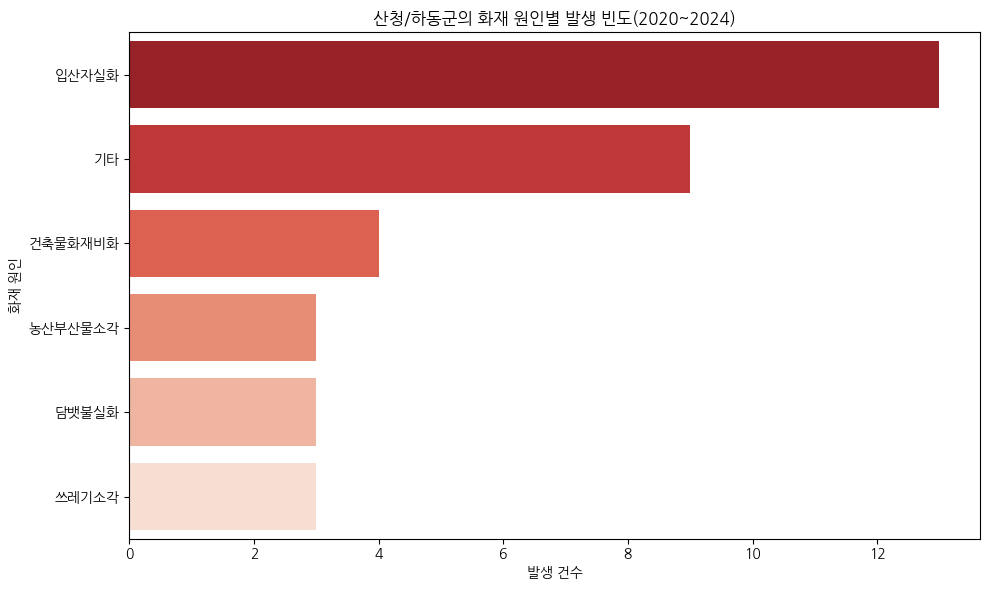

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÎπàÎèÑÏàò ÏßëÍ≥Ñ
cause_counts = filtered_df['firecause'].value_counts().reset_index()
cause_counts.columns = ['firecause', 'count']

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=cause_counts, x='count', y='firecause', palette='Reds_r')
plt.title('ÏÇ∞Ï≤≠/ÌïòÎèôÍµ∞Ïùò ÌôîÏû¨ ÏõêÏù∏Î≥Ñ Î∞úÏÉù ÎπàÎèÑ(2020~2024)')
plt.xlabel('Î∞úÏÉù Í±¥Ïàò')
plt.ylabel('ÌôîÏû¨ ÏõêÏù∏')
plt.tight_layout()
plt.show()

## Í≤ΩÎÇ® Î∞úÌôîÏõêÏù∏ ÏãúÍ∞ÅÌôî

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/720104928.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cause_counts, x='count', y='firecause', palette='Blues_r')


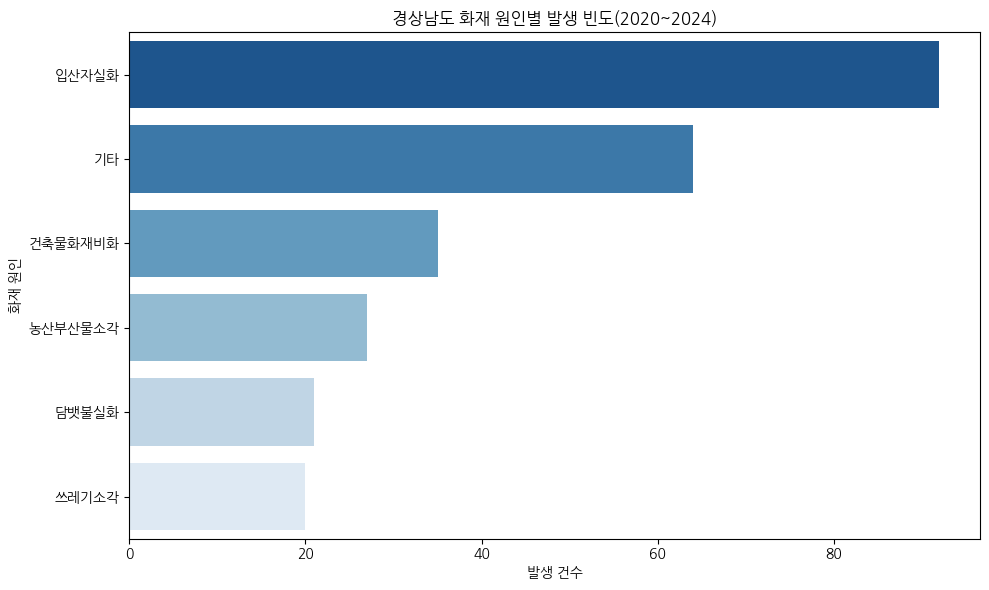

In [31]:
# 1. ÎπàÎèÑÏàò ÏßëÍ≥Ñ
cause_counts = gn_df['firecause'].value_counts().reset_index()
cause_counts.columns = ['firecause', 'count']

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=cause_counts, x='count', y='firecause', palette='Blues_r')
plt.title('Í≤ΩÏÉÅÎÇ®ÎèÑ ÌôîÏû¨ ÏõêÏù∏Î≥Ñ Î∞úÏÉù ÎπàÎèÑ(2020~2024)')
plt.xlabel('Î∞úÏÉù Í±¥Ïàò')
plt.ylabel('ÌôîÏû¨ ÏõêÏù∏')
plt.tight_layout()
plt.show()

In [25]:
filtered_df['firecause'].value_counts()

firecause
ÏûÖÏÇ∞ÏûêÏã§Ìôî      13
Í∏∞ÌÉÄ          9
Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî     4
ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     3
Îã¥Î±ÉÎ∂àÏã§Ìôî       3
Ïì∞Î†àÍ∏∞ÏÜåÍ∞Å       3
Name: count, dtype: int64

In [26]:
gn_df['firecause'].value_counts()

firecause
ÏûÖÏÇ∞ÏûêÏã§Ìôî      92
Í∏∞ÌÉÄ         64
Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî    35
ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å    27
Îã¥Î±ÉÎ∂àÏã§Ìôî      21
Ïì∞Î†àÍ∏∞ÏÜåÍ∞Å      20
Name: count, dtype: int64

In [34]:
filtered_df.head(1)

damagearea endday endmonth   endtime endyear firecause locbunji locdong  \
56       0.01     08       02  18:30:00    2020   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     ÏÇ∞166      ÌïòÏ†ï   

   locgungu locsi startday startdayofweek startmonth starttime  startyear  \
56       ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       08            ÌÜ†ÏöîÏùº         02  17:50:00       2020   

   locmenu     full_location  
56      Ïã†Ïïà  ÏÇ∞Ï≤≠Íµ∞ Ïã†ÏïàÎ©¥ ÌïòÏ†ïÎ¶¨ ÏÇ∞166

In [76]:
gn_df

damagearea endday endmonth   endtime endyear firecause locbunji locdong  \
20         0.01     21       01  14:46:00    2020     ÏûÖÏÇ∞ÏûêÏã§Ìôî     ÏÇ∞106      Í≥†Î°Ä   
33         0.02     21       02  16:00:00    2020     Îã¥Î±ÉÎ∂àÏã§Ìôî      ÏÇ∞47      Ìá¥Ï¥å   
53         0.03     09       02  16:45:00    2020   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî     ÏÇ∞109      ÌïòÍ≥°   
56         0.01     08       02  18:30:00    2020   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     ÏÇ∞166      ÌïòÏ†ï   
61         0.01     06       02  16:29:00    2020     Îã¥Î±ÉÎ∂àÏã§Ìôî    ÏÇ∞71-3      Í∏àÌèâ   
...         ...    ...      ...       ...     ...       ...      ...     ...   
2508        0.2     31       08  18:00:00    2024        Í∏∞ÌÉÄ      ÏÇ∞77      Í¥ÄÏßÄ   
2514        0.1     10       09  18:00:00    2024        Í∏∞ÌÉÄ       52      ÎÇ¥Ïù¥   
2519        0.1     13       10  13:06:00    2024     Îã¥Î±ÉÎ∂àÏã§Ìôî   ÏÇ∞142-4      ÏÇºÎçï   
2524        0.3     18       11  19:29:00    2024     ÏûÖÏÇ∞ÏûêÏã§Ìôî    ÏÇ∞11-1      Í∞àÍ≥Ñ   
2543        0.7     20       12  10:00:00    2024     ÏûÖÏÇ∞ÏûêÏã§Ìôî     ÏÇ∞206      ÎØ∏Ï°∞   

     locgungu locsi startday startdayofweek startmonth starttime  startyear  \
20         Î∞ÄÏñë    Í≤ΩÎÇ®       21            ÌôîÏöîÏùº         01  13:20:00       2020   
33         Ï∞ΩÏõê    Í≤ΩÎÇ®       21            Í∏àÏöîÏùº         02  12:44:00       2020   
53         ÏßÑÏ£º    Í≤ΩÎÇ®       09            ÏùºÏöîÏùº         02  15:48:00       2020   
56         ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       08            ÌÜ†ÏöîÏùº         02  17:50:00       2020   
61         ÌÜµÏòÅ    Í≤ΩÎÇ®       06            Î™©ÏöîÏùº         02  15:32:00       2020   
...       ...   ...      ...            ...        ...       ...        ...   
2508       ÏßÑÏ£º    Í≤ΩÎÇ®       31            ÌÜ†ÏöîÏùº         08  14:54:00       2024   
2514       Î∞ÄÏñë    Í≤ΩÎÇ®       10            ÌôîÏöîÏùº         09  15:55:00       2024   
2519       ÌÜµÏòÅ    Í≤ΩÎÇ®       13            ÏùºÏöîÏùº         10  11:02:00       2024   
2524       Í±∞Ï∞Ω    Í≤ΩÎÇ®       18            ÏõîÏöîÏùº         11  15:16:00       2024   
2543       ÎÇ®Ìï¥    Í≤ΩÎÇ®       19            Î™©ÏöîÏùº         12  22:03:00       2024   

     locmenu  startdate  month region  
20        Îã®Ïû• 2020-01-21      1     Í∏∞ÌÉÄ  
33        ÏùòÏ∞Ω 2020-02-21      2     Í∏∞ÌÉÄ  
53       Ïù¥Î∞òÏÑ± 2020-02-09      2     Í∏∞ÌÉÄ  
56        Ïã†Ïïà 2020-02-08      2  ÏÇ∞Ï≤≠¬∑ÌïòÎèô  
61        ÏÇ¨Îüâ 2020-02-06      2     Í∏∞ÌÉÄ  
...      ...        ...    ...    ...  
2508      Î™ÖÏÑù 2024-08-31      8     Í∏∞ÌÉÄ  
2514     NaN 2024-09-10      9     Í∏∞ÌÉÄ  
2519      ÏÇ∞Ïñë 2024-10-13     10     Í∏∞ÌÉÄ  
2524      Î∂ÅÏÉÅ 2024-11-18     11     Í∏∞ÌÉÄ  
2543      ÎØ∏Ï°∞ 2024-12-19     12     Í∏∞ÌÉÄ  

[259 rows x 19 columns]

In [75]:
gn_df.to_csv('Í≤ΩÎÇ®_ÏÇ∞Î∂àÎ∞úÏÉùÏù¥Î†•_2020~2024.csv')

## startdate Ïª¨Îüº ÏÉùÏÑ± Î∞è ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω

In [44]:
filtered_df['startdate'] = (
    filtered_df['startyear'].astype(str) + '-' +
    filtered_df['startmonth'].astype(str) + '-' +
    filtered_df['startday'].astype(str)
)
filtered_df.head(1)

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/2073920800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['startdate'] = (


damagearea endday endmonth   endtime endyear firecause locbunji locdong  \
56       0.01     08       02  18:30:00    2020   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     ÏÇ∞166      ÌïòÏ†ï   

   locgungu locsi startday startdayofweek startmonth starttime  startyear  \
56       ÏÇ∞Ï≤≠    Í≤ΩÎÇ®       08            ÌÜ†ÏöîÏùº         02  17:50:00       2020   

   locmenu     full_location        starttimestamp   startdate  
56      Ïã†Ïïà  ÏÇ∞Ï≤≠Íµ∞ Ïã†ÏïàÎ©¥ ÌïòÏ†ïÎ¶¨ ÏÇ∞166  2020-02- 08 17:50:00  2020-02-08

In [ ]:
filtered_df['startdate'] = pd.to_datetime(filtered_df['startdate'])

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/2808029921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['startdate'] = pd.to_datetime(filtered_df['startdate'])


In [46]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 56 to 2395
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   damagearea      35 non-null     object        
 1   endday          35 non-null     object        
 2   endmonth        35 non-null     object        
 3   endtime         35 non-null     object        
 4   endyear         35 non-null     object        
 5   firecause       35 non-null     object        
 6   locbunji        35 non-null     object        
 7   locdong         35 non-null     object        
 8   locgungu        35 non-null     object        
 9   locsi           35 non-null     object        
 10  startday        35 non-null     object        
 11  startdayofweek  35 non-null     object        
 12  startmonth      35 non-null     object        
 13  starttime       35 non-null     object        
 14  startyear       35 non-null     int64         
 15  locmenu   

In [51]:
gn_df['startdate'] = (
    gn_df['startyear'].astype(str) + '-' +
    gn_df['startmonth'].astype(str) + '-' +
    gn_df['startday'].astype(str)
)
gn_df['startdate'] = pd.to_datetime(gn_df['startdate'])

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/222490202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_df['startdate'] = (
/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/222490202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_df['startdate'] = pd.to_datetime(gn_df['startdate'])


## ÏõîÎ≥Ñ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

/var/folders/wn/fg3vjbj159x6j8g18tzqxpwm0000gn/T/ipykernel_53075/3409363195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['startdate'].dt.month


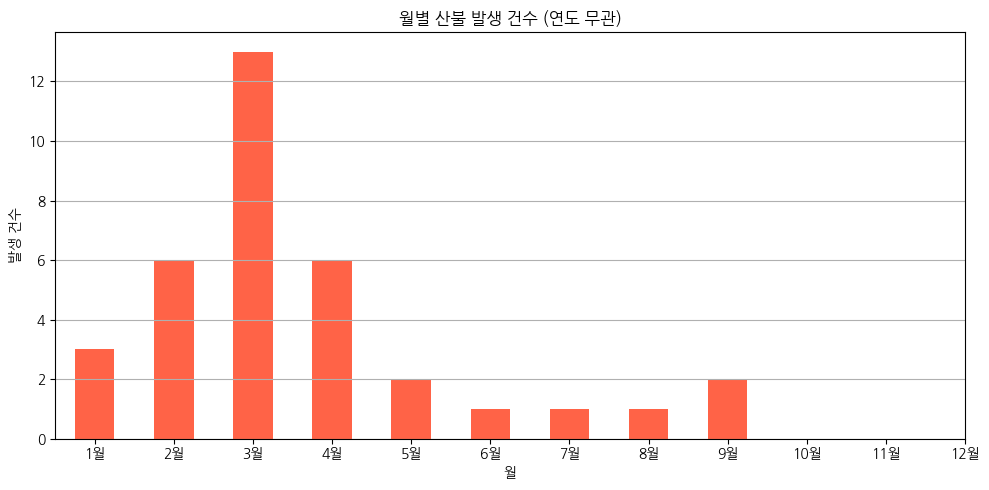

In [ ]:
# Ïõî(Month)Îßå Ï∂îÏ∂ú
filtered_df['month'] = filtered_df['startdate'].dt.month

# ÏõîÎ≥Ñ ÏÇ∞Î∂à Î∞úÏÉù Í±¥Ïàò ÏßëÍ≥Ñ
monthly_counts = filtered_df['month'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='tomato')
plt.title(' ÏõîÎ≥Ñ ÏÇ∞Î∂à Î∞úÏÉù Í±¥Ïàò (Ïó∞ÎèÑ Î¨¥Í¥Ä)')
plt.xlabel('Ïõî')
plt.ylabel('Î∞úÏÉù Í±¥Ïàò')
plt.xticks(ticks=range(0, 12), labels=[f'{i}Ïõî' for i in range(1, 13)], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## ÏöîÏùºÎ≥Ñ Î∞úÏÉù Í±¥Ïàò ÏßëÍ≥Ñ

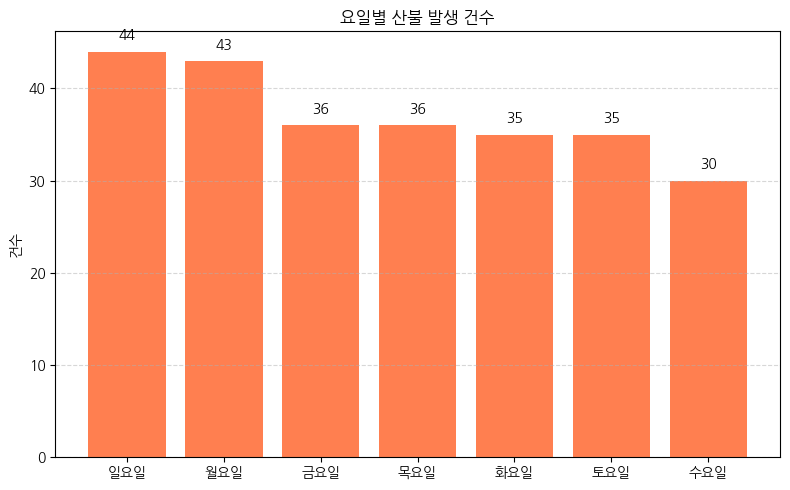

In [62]:
# 1. ÏöîÏùºÎ≥Ñ Î∞úÏÉù Í±¥Ïàò ÏßëÍ≥Ñ
weekday_counts = gn_df['startdayofweek'].value_counts()


# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
bars = plt.bar(weekday_counts.index, weekday_counts.values, color='coral')

# 3. ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, int(height),
             ha='center', va='bottom', fontsize=10)

plt.title('ÏöîÏùºÎ≥Ñ ÏÇ∞Î∂à Î∞úÏÉù Í±¥Ïàò')
plt.ylabel('Í±¥Ïàò')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# geoservice ÌôúÏö© -> Ï¢åÌëú Ïª¨Îüº Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [14]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [63]:
gdf = pd.read_csv('/Users/joomacbook/Desktop/Í≤ΩÎÇ® ÎπÖÎç∞Ïù¥ÌÑ∞ Í≥µÎ™®Ï†Ñ/ÏÇ∞Ï≤≠+ÌïòÎèô_5ÎÖÑÍ∞ÑÏÇ∞Î∂àÎ∞úÏÉùÏ¢åÌëú.csv')

In [64]:
gdf.drop('field1', axis=1, inplace=True)

### Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω

In [65]:
new_columns = [
    'damagearea', 'endday', 'endmonth', 'endtime', 'endyear', 'firecause',
    'locbunji', 'locdong', 'locgungu', 'locsi', 'startday', 'startdayofweek',
    'startmonth', 'starttime', 'startyear', 'locmenu', 'full_location'
]
gdf.columns = new_columns + ['GC_TYPE', 'CLEANADDR', 'X', 'Y']


In [66]:
gdf.head()

damagearea  endday  endmonth   endtime  endyear firecause locbunji locdong  \
0        0.01       8         2  18:30:00     2020   ÎÜçÏÇ∞Î∂ÄÏÇ∞Î¨ºÏÜåÍ∞Å     ÏÇ∞166      ÌïòÏ†ï   
1        0.05      24         3  02:10:00     2020     ÏûÖÏÇ∞ÏûêÏã§Ìôî       ÏÇ∞7      Î¨∏ÎåÄ   
2        0.01      19         3  22:30:00     2020     Îã¥Î±ÉÎ∂àÏã§Ìôî    ÏÇ∞65-1      Í∂ÅÌï≠   
3        0.02      18         3  16:00:00     2020   Í±¥Ï∂ïÎ¨ºÌôîÏû¨ÎπÑÌôî    ÏÇ∞47-1      Ïö¥Ïàò   
4        0.02      19         3  19:00:00     2020        Í∏∞ÌÉÄ    ÏÇ∞66-1      Ï†ÑÎåÄ   

  locgungu locsi  ...  startdayofweek startmonth  starttime startyear  \
0       ÏÇ∞Ï≤≠    Í≤ΩÎÇ®  ...             ÌÜ†ÏöîÏùº          2   17:50:00      2020   
1       ÏÇ∞Ï≤≠    Í≤ΩÎÇ®  ...             ÏõîÏöîÏùº          3   23:22:00      2020   
2       ÌïòÎèô    Í≤ΩÎÇ®  ...             Î™©ÏöîÏùº          3   19:49:00      2020   
3       ÌïòÎèô    Í≤ΩÎÇ®  ...             ÏàòÏöîÏùº          3   13:07:00      2020   
4       ÌïòÎèô    Í≤ΩÎÇ®  ...             Î™©ÏöîÏùº          3   16:30:00      2020   

   locmenu      full_location GC_TYPE                CLEANADDR           X  \
0       Ïã†Ïïà   ÏÇ∞Ï≤≠Íµ∞ Ïã†ÏïàÎ©¥ ÌïòÏ†ïÎ¶¨ ÏÇ∞166       Ï†ï   Í≤ΩÏÉÅÎÇ®ÎèÑ ÏÇ∞Ï≤≠Íµ∞ Ïã†ÏïàÎ©¥ ÌïòÏ†ïÎ¶¨ ÏÇ∞ 166  127.970234   
1       Ïã†Ïïà     ÏÇ∞Ï≤≠Íµ∞ Ïã†ÏïàÎ©¥ Î¨∏ÎåÄÎ¶¨ ÏÇ∞7       Ï†ï     Í≤ΩÏÉÅÎÇ®ÎèÑ ÏÇ∞Ï≤≠Íµ∞ Ïã†ÏïàÎ©¥ Î¨∏ÎåÄÎ¶¨ ÏÇ∞ 7  127.997928   
2       Ïò•Ï¢Ö  ÌïòÎèôÍµ∞ Ïò•Ï¢ÖÎ©¥ Í∂ÅÌï≠Î¶¨ ÏÇ∞65-1       Ï†ï  Í≤ΩÏÉÅÎÇ®ÎèÑ ÌïòÎèôÍµ∞ Ïò•Ï¢ÖÎ©¥ Í∂ÅÌï≠Î¶¨ ÏÇ∞ 65-1  127.819498   
3       ÌôîÍ∞ú  ÌïòÎèôÍµ∞ ÌôîÍ∞úÎ©¥ Ïö¥ÏàòÎ¶¨ ÏÇ∞47-1       Ï†ï  Í≤ΩÏÉÅÎÇ®ÎèÑ ÌïòÎèôÍµ∞ ÌôîÍ∞úÎ©¥ Ïö¥ÏàòÎ¶¨ ÏÇ∞ 47-1  127.663921   
4       Ìö°Ï≤ú  ÌïòÎèôÍµ∞ Ìö°Ï≤úÎ©¥ Ï†ÑÎåÄÎ¶¨ ÏÇ∞66-1       Ï†ï  Í≤ΩÏÉÅÎÇ®ÎèÑ ÌïòÎèôÍµ∞ Ìö°Ï≤úÎ©¥ Ï†ÑÎåÄÎ¶¨ ÏÇ∞ 66-1  127.832766   

           Y  
0  35.298082  
1  35.345930  
2  35.202554  
3  35.240547  
4  35.153261  

[5 rows x 21 columns]

In [67]:
# Ï¢åÌëú ‚Üí Point ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
geometry = [Point(xy) for xy in zip(gdf['X'], gdf['Y'])]

# GeoDataFrame ÏÉùÏÑ± (ÏúÑÍ≤ΩÎèÑ Ï¢åÌëúÍ≥Ñ: EPSG:4326)
fire_gdf = gpd.GeoDataFrame(gdf, geometry=geometry, crs='EPSG:4326')


### Î≤ÑÌçº ÏÉùÏÑ± (1km, 3km, 5km)

In [21]:
# 3. Î≤ÑÌçº ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ meter Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò
fire_gdf_meter = fire_gdf.to_crs(epsg=5181)  # Korea TM

# 4. 1km, 3km, 5km Î≤ÑÌçº ÏÉùÏÑ±
buffer_1km = fire_gdf_meter.buffer(1000).to_crs(epsg=4326)
buffer_2km = fire_gdf_meter.buffer(2000).to_crs(epsg=4326)
buffer_3km = fire_gdf_meter.buffer(3000).to_crs(epsg=4326)


### ÏßÄÎèÑÏóê ÏãúÍ∞ÅÌôî (Ïòà: folium)

In [22]:
# 5. folium ÏßÄÎèÑ ÏÉùÏÑ±
center = [fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=11)

# 6. ÏÇ∞Î∂à ÏßÄÏ†ê ÎßàÏª§ ÌëúÏãú
for _, row in fire_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=1
    ).add_to(m)

# 7. Î≤ÑÌçº Í∞ÅÍ∞Å ÏßÄÎèÑÏóê Ï∂îÍ∞Ä (1km = ÌååÎûë, 3km = Ï£ºÌô©, 5km = ÌöåÏÉâ)
colors = ['blue', 'orange', 'gray']
buffers = [buffer_1km, buffer_2km, buffer_3km]
labels = ['1km', '3km', '5km']

for buf, color, label in zip(buffers, colors, labels):
    for geom in buf:
        folium.GeoJson(
            geom,
            style_function=lambda x, col=color: {'color': col, 'weight': 2, 'fillOpacity': 0.1},
            name=f'{label} buffer'
        ).add_to(m)

# 8. Î†àÏù¥Ïñ¥ Ïª®Ìä∏Î°§ Ï∂îÍ∞Ä
folium.LayerControl().add_to(m)

# 9. Í≤∞Í≥º Ï†ÄÏû•
m.save("fire_buffers_all.html")

In [68]:
# 1. Ï†ÑÏ≤¥ Í≤ΩÎÇ® ÌñâÏ†ïÍµ¨Ïó≠ Í≤ΩÍ≥Ñ Î∂àÎü¨Ïò§Í∏∞ (GeoDataFrame)
# ÏòàÏãú ÌååÏùº Í≤ΩÎ°ú: 'Í≤ΩÎÇ®_ÌñâÏ†ïÍ≤ΩÍ≥Ñ.shp'
gdf_admin = gpd.read_file('/Users/joomacbook/Desktop/Í≤ΩÎÇ® ÎπÖÎç∞Ïù¥ÌÑ∞ Í≥µÎ™®Ï†Ñ/LARD_ADM_SECT_SGG_Í≤ΩÎÇ®/LARD_ADM_SECT_SGG_48_202505.shp')

In [24]:
gdf_admin

ADM_SECT_C          SGG_NM  SGG_OID COL_ADM_SE  \
0       48121    Í≤ΩÏÉÅÎÇ®ÎèÑ Ï∞ΩÏõêÏãú ÏùòÏ∞ΩÍµ¨  10622.0      48120   
1       48123    Í≤ΩÏÉÅÎÇ®ÎèÑ Ï∞ΩÏõêÏãú ÏÑ±ÏÇ∞Íµ¨      NaN      48120   
2       48125  Í≤ΩÏÉÅÎÇ®ÎèÑ Ï∞ΩÏõêÏãú ÎßàÏÇ∞Ìï©Ìè¨Íµ¨  10654.0      48120   
3       48127  Í≤ΩÏÉÅÎÇ®ÎèÑ Ï∞ΩÏõêÏãú ÎßàÏÇ∞ÌöåÏõêÍµ¨  10714.0      48120   
4       48129    Í≤ΩÏÉÅÎÇ®ÎèÑ Ï∞ΩÏõêÏãú ÏßÑÌï¥Íµ¨  10618.0      48120   
5       48170        Í≤ΩÏÉÅÎÇ®ÎèÑ ÏßÑÏ£ºÏãú      1.0      48170   
6       48220        Í≤ΩÏÉÅÎÇ®ÎèÑ ÌÜµÏòÅÏãú      NaN      48220   
7       48240        Í≤ΩÏÉÅÎÇ®ÎèÑ ÏÇ¨Ï≤úÏãú   1971.0      48240   
8       48250        Í≤ΩÏÉÅÎÇ®ÎèÑ ÍπÄÌï¥Ïãú    355.0      48250   
9       48270        Í≤ΩÏÉÅÎÇ®ÎèÑ Î∞ÄÏñëÏãú      1.0      48270   
10      48310        Í≤ΩÏÉÅÎÇ®ÎèÑ Í±∞Ï†úÏãú  21490.0      48310   
11      48330        Í≤ΩÏÉÅÎÇ®ÎèÑ ÏñëÏÇ∞Ïãú   2391.0      48330   
12      48720        Í≤ΩÏÉÅÎÇ®ÎèÑ ÏùòÎ†πÍµ∞      2.0      48720   
13      48730        Í≤ΩÏÉÅÎÇ®ÎèÑ Ìï®ÏïàÍµ∞      2.0      48730   
14      48740        Í≤ΩÏÉÅÎÇ®ÎèÑ Ï∞ΩÎÖïÍµ∞      1.0      48740   
15      48820        Í≤ΩÏÉÅÎÇ®ÎèÑ Í≥†ÏÑ±Íµ∞      NaN      48820   
16      48840        Í≤ΩÏÉÅÎÇ®ÎèÑ ÎÇ®Ìï¥Íµ∞      1.0      48840   
17      48850        Í≤ΩÏÉÅÎÇ®ÎèÑ ÌïòÎèôÍµ∞      1.0      48850   
18      48860        Í≤ΩÏÉÅÎÇ®ÎèÑ ÏÇ∞Ï≤≠Íµ∞     34.0      48860   
19      48870        Í≤ΩÏÉÅÎÇ®ÎèÑ Ìï®ÏñëÍµ∞      1.0      48870   
20      48880        Í≤ΩÏÉÅÎÇ®ÎèÑ Í±∞Ï∞ΩÍµ∞      1.0      48880   
21      48890        Í≤ΩÏÉÅÎÇ®ÎèÑ Ìï©Ï≤úÍµ∞      1.0      48890   

                                             geometry  
0   POLYGON ((349215.311 309694.213, 349308.607 30...  
1   MULTIPOLYGON (((345338.621 287072.14, 345334.5...  
2   MULTIPOLYGON (((343629.974 275247.393, 343633....  
3   POLYGON ((341729.834 298945.548, 341762.869 29...  
4   MULTIPOLYGON (((352768.212 274811.909, 352766....  
5   POLYGON ((305137.543 306500.038, 305169.107 30...  
6   MULTIPOLYGON (((335615.347 212368.078, 335613....  
7   MULTIPOLYGON (((298806.807 255358.43, 298808.6...  
8   POLYGON ((370298.949 310714.416, 370298.963 31...  
9   POLYGON ((373731.307 339660.103, 373783.465 33...  
10  MULTIPOLYGON (((348168.079 232935.217, 348170....  
11  POLYGON ((386537.596 327758.467, 386530.72 327...  
12  POLYGON ((325568.443 324812.699, 325995.336 32...  
13  POLYGON ((340292.399 310314.916, 340702.691 31...  
14  POLYGON ((338486.917 343886.906, 338474.911 34...  
15  MULTIPOLYGON (((313634.083 254047.942, 313633....  
16  MULTIPOLYGON (((299424.537 211971.935, 299423....  
17  MULTIPOLYGON (((276211.827 259291.951, 276226....  
18  POLYGON ((278642.403 331212.119, 278694.619 33...  
19  POLYGON ((262988.217 351370.297, 262988.602 35...  
20  POLYGON ((279721.694 367959.381, 279709.674 36...  
21  POLYGON ((299033.786 359987.772, 299080.245 35...

In [25]:
# 1. ÏßÄÎèÑ Í∞ùÏ≤¥ ÏÉùÏÑ±
m = folium.Map(location=[fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()], zoom_start=10)

# 2. ÏÇ∞Î∂à ÏßÄÏ†ê Î≤ÑÌçº (1km, 3km, 5km)
buffer_distances = [1000, 2000, 3000]  # meters
colors = ['red', 'orange', 'blue']
labels = ['1km', '2km', '3km']

# EPSG:4326 Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò
fire_gdf_4326 = fire_gdf.to_crs(epsg=4326)

# Í∞ÅÍ∞ÅÏùò Í±∞Î¶¨Î°ú Î≤ÑÌçº ÏÉùÏÑ± ÌõÑ ÏßÄÎèÑÏóê Ï∂îÍ∞Ä
for dist, color, label in zip(buffer_distances, colors, labels):
    # ÏõêÎûò Ï¢åÌëúÍ≥ÑÎ°ú Î≤ÑÌçº ÏÉùÏÑ± (ÎØ∏ÌÑ∞ Îã®ÏúÑ)
    buffered = fire_gdf.copy()
    buffered = buffered.to_crs(epsg=5186)  # Î≤ÑÌçº ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÎØ∏ÌÑ∞ Îã®ÏúÑ Ï¢åÌëúÍ≥Ñ
    buffered['geometry'] = buffered.buffer(dist)
    buffered = buffered.to_crs(epsg=4326)  # Îã§Ïãú foliumÏö© Ï¢åÌëúÍ≥ÑÎ°ú

    # GeoJson Ï∂îÍ∞Ä
    folium.GeoJson(
        buffered,
        style_function=lambda x, col=color: {'color': col, 'weight': 2, 'fillOpacity': 0.1},
        name=f'{label} Î≤ÑÌçº'
    ).add_to(m)

# 3. ÏÇ∞Ï≤≠Íµ∞¬∑ÌïòÎèôÍµ∞ Í≤ΩÍ≥ÑÏÑ† Ï∂îÍ∞Ä
gdf_boundary = gdf_admin[gdf_admin['SGG_NM'].str.contains('ÌïòÎèôÍµ∞|ÏÇ∞Ï≤≠Íµ∞')].to_crs(epsg=4326)

folium.GeoJson(
    gdf_boundary,
    style_function=lambda x: {
        'color': 'green',
        'weight': 3,
        'fillOpacity': 0,
        'dashArray': '5, 5'
    },
    name='ÌñâÏ†ïÍ≤ΩÍ≥ÑÏÑ†'
).add_to(m)

# 4. Layer Control Ï∂îÍ∞Ä
folium.LayerControl().add_to(m)

# 5. Ï†ÄÏû• or Ï∂úÎ†•
m.save('map_with_buffers_and_boundary.html')

## ÏÇ∞Î∂àÏßÄÏ†ê ÏãúÍ∞ÅÌôî(Î≥¥Í≥†ÏÑúÏö©)

In [69]:
# 5. folium ÏßÄÎèÑ ÏÉùÏÑ±
center = [fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()]
m = folium.Map(location=[fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()], zoom_start=10)

# 6. ÏÇ∞Î∂à ÏßÄÏ†ê ÎßàÏª§ ÌëúÏãú
for _, row in fire_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=1
    ).add_to(m)


# EPSG:4326 Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò
fire_gdf_4326 = fire_gdf.to_crs(epsg=4326)

# 3. ÏÇ∞Ï≤≠Íµ∞¬∑ÌïòÎèôÍµ∞ Í≤ΩÍ≥ÑÏÑ† Ï∂îÍ∞Ä
gdf_boundary = gdf_admin[gdf_admin['SGG_NM'].str.contains('ÌïòÎèôÍµ∞|ÏÇ∞Ï≤≠Íµ∞')].to_crs(epsg=4326)

folium.GeoJson(
    gdf_boundary,
    style_function=lambda x: {
        'color': 'green',
        'weight': 3,
        'fillOpacity': 0,
        'dashArray': '5, 5'
    },
    name='ÌñâÏ†ïÍ≤ΩÍ≥ÑÏÑ†'
).add_to(m)


# 5. Ï†ÄÏû• or Ï∂úÎ†•
m.save('ÏÇ∞Î∂àÎ∞úÏÉùÏßÄÏ†ê.html')

In [71]:
import folium
from folium.features import DivIcon

# 1. ÏßÄÎèÑ Ï§ëÏã¨ ÏÑ§Ï†ï
center = [fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=10)

# 2. EPSG:4326 Î≥ÄÌôò
fire_gdf_4326 = fire_gdf.to_crs(epsg=4326)
gdf_boundary = gdf_admin[gdf_admin['SGG_NM'].str.contains('ÌïòÎèô|ÏÇ∞Ï≤≠')].to_crs(epsg=4326)

# 3. ÏÇ∞Î∂à ÏßÄÏ†ê ÎßàÏª§ & ÌÖçÏä§Ìä∏ ÌëúÏãú
for _, row in fire_gdf_4326.iterrows():
    lat = row.geometry.y
    lon = row.geometry.x
    cause = row['firecause']

    # ÏõêÌòï ÎßàÏª§
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=1
    ).add_to(m)

    # ÌÖçÏä§Ìä∏ ÎùºÎ≤® (firecause)
    folium.map.Marker(
        [lat + 0.002, lon],  # ÎßàÏª§ ÏúÑ ÏÇ¥Ïßù ÏúÑÎ°ú Ïò¨Î¶º
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 10pt; color: black;">{cause}</div>'
        )
    ).add_to(m)

# 4. Í≤ΩÍ≥ÑÏÑ† Ï∂îÍ∞Ä
folium.GeoJson(
    gdf_boundary,
    style_function=lambda x: {
        'color': 'green',
        'weight': 3,
        'fillOpacity': 0,
        'dashArray': '5, 5'
    },
    name='ÌñâÏ†ïÍ≤ΩÍ≥ÑÏÑ†'
).add_to(m)

# 5. Ï†ÄÏû•
m.save('ÏÇ∞Î∂àÎ∞úÏÉùÏßÄÏ†ê.html')

In [73]:
import folium
import seaborn as sns
from folium import Map, CircleMarker, GeoJson
from folium.features import Element

# 1. Í≥†Ïú† firecause Î™©Î°ùÍ≥º ÏßÑÌïú ÏÉâÏÉÅ Îß§Ìïë
firecauses = fire_gdf['firecause'].dropna().unique()
colors = sns.color_palette('Dark2', n_colors=len(firecauses)).as_hex()  # ÏßÑÌïú ÏÉâ
cause_color_map = dict(zip(firecauses, colors))

# 2. ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()], zoom_start=10)

# 3. EPSG:4326 Î≥ÄÌôò
fire_gdf_4326 = fire_gdf.to_crs(epsg=4326)

# 4. ÏÇ∞Î∂à ÏßÄÏ†ê ÎßàÏª§ ÌëúÏãú
for _, row in fire_gdf_4326.iterrows():
    cause = row['firecause']
    color = cause_color_map.get(cause, 'gray')

    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.9
    ).add_to(m)

# 5. ÏÇ∞Ï≤≠/ÌïòÎèô ÌñâÏ†ïÍ≤ΩÍ≥Ñ Ï∂îÍ∞Ä
gdf_boundary = gdf_admin[gdf_admin['SGG_NM'].str.contains('ÌïòÎèô|ÏÇ∞Ï≤≠')].to_crs(epsg=4326)
folium.GeoJson(
    gdf_boundary,
    style_function=lambda x: {
        'color': 'green',
        'weight': 3,
        'fillOpacity': 0,
        'dashArray': '5, 5'
    },
    name='ÌñâÏ†ïÍ≤ΩÍ≥ÑÏÑ†'
).add_to(m)

# 6. Î≤îÎ°Ä(legend) Ï∂îÍ∞Ä
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 220px; height: auto; 
            z-index:9999; font-size:14px; 
            background-color: white; padding: 10px; 
            border:2px solid grey; border-radius: 5px;">
<b>üî• ÏÇ∞Î∂à ÏõêÏù∏ Î≤îÎ°Ä</b><br>
"""
for cause, color in cause_color_map.items():
    legend_html += f"""
    <i style="background:{color}; width:12px; height:12px; float:left; margin-right:6px; display:inline-block;"></i>
    {cause}<br>
    """
legend_html += "</div>"

m.get_root().html.add_child(Element(legend_html))

# 7. Ï†ÄÏû•
m.save('ÏÇ∞Î∂àÎ∞úÏÉùÏßÄÏ†ê_ÏßÑÌïúÏÉâ.html')


# ÎåÄÌòïÏÇ∞Î∂àÏúÑÌóòÏòàÎ≥¥

In [28]:
weather = pd.read_csv("/Users/joomacbook/Desktop/Í≤ΩÎÇ® ÎπÖÎç∞Ïù¥ÌÑ∞ Í≥µÎ™®Ï†Ñ/ÏÇ∞Î¶ºÏ≤≠ Íµ≠Î¶ΩÏÇ∞Î¶ºÍ≥ºÌïôÏõê_ÎåÄÌòïÏÇ∞Î∂àÏúÑÌóòÏòàÎ≥¥Î™©Î°ùÏ†ïÎ≥¥_20250228.csv", encoding='cp949')

In [29]:
weather

ÏòàÎ≥¥ÏùºÏãú   ÏãúÎèÑÎ™Ö    ÏãúÍµ∞Íµ¨Î™Ö ÏùçÎ©¥ÎèôÎ™Ö  Ïã§Ìö®ÏäµÎèÑ    ÌíçÏÜç   Îì±Í∏â
0      2017-01-17 15:00   Í∞ïÏõêÎèÑ     Ïù∏Ï†úÍµ∞   Î∂ÅÎ©¥  34.6   7.3  Ï£ºÏùòÎ≥¥
1      2017-01-23 11:00  Í≤ΩÏÉÅÎ∂ÅÎèÑ  Ìè¨Ìï≠Ïãú ÎÇ®Íµ¨  Ïû•Í∏∞Î©¥  30.9   7.3  Ï£ºÏùòÎ≥¥
2      2017-01-24 14:00  Ï†ÑÎùºÎÇ®ÎèÑ     Ïó¨ÏàòÏãú  Í≤ΩÌò∏Îèô  36.2   7.3  Ï£ºÏùòÎ≥¥
3      2017-01-27 10:00  Í≤ΩÏÉÅÎ∂ÅÎèÑ  Ìè¨Ìï≠Ïãú Î∂ÅÍµ¨  Í∏∞Í≥ÑÎ©¥  34.2   8.4  Ï£ºÏùòÎ≥¥
4      2017-01-27 10:00  Í≤ΩÏÉÅÎ∂ÅÎèÑ     Í≤ΩÏ£ºÏãú  ÏïàÍ∞ïÏùç  34.1   7.8  Ï£ºÏùòÎ≥¥
...                 ...   ...     ...  ...   ...   ...  ...
40396  2025-02-28 13:00    Í≤ΩÎ∂Å      ÏòÅÏ£º  ÏïàÏ†ïÎ©¥  33.0   8.7  Ï£ºÏùòÎ≥¥
40397  2025-02-28 13:00    Í≤ΩÎ∂Å      ÏòàÏ≤ú  Í∞êÏ≤úÎ©¥  33.0   7.3  Ï£ºÏùòÎ≥¥
40398  2025-02-28 13:00    Í≤ΩÎ∂Å      Î¥âÌôî  Î¥âÌôîÏùç  33.0   7.9  Ï£ºÏùòÎ≥¥
40399  2025-02-28 13:00    Í∞ïÏõê      ÏñëÏñë  ÏÜêÏñëÎ©¥  27.7  11.7  Ï£ºÏùòÎ≥¥
40400  2025-02-28 14:00    Í∞ïÏõê      ÏñëÏñë  ÏÜêÏñëÎ©¥  27.6  11.7  Ï£ºÏùòÎ≥¥

[40401 rows x 7 columns]

In [30]:
# Îì±Í∏âÏù¥ 'Ï£ºÏùòÎ≥¥'Ïù∏ ÌñâÎì§ Ï§ë Ïã§Ìö®ÏäµÎèÑÏùò ÏµúÏÜåÍ∞í Íµ¨ÌïòÍ∏∞
min_value = weather[weather['Îì±Í∏â'] == 'Ï£ºÏùòÎ≥¥']['Ïã§Ìö®ÏäµÎèÑ'].min()
print(min_value)

0.0


In [31]:
# Îì±Í∏âÏù¥ 'Ï£ºÏùòÎ≥¥'Ïù∏ ÌñâÎì§ Ï§ë ÌíçÏÜçÏùò ÏµúÏÜåÍ∞í Íµ¨ÌïòÍ∏∞
min_value = weather[weather['Îì±Í∏â'] == 'Ï£ºÏùòÎ≥¥']['ÌíçÏÜç'].min()
print(min_value)

7.0


In [32]:
weather.groupby('Îì±Í∏â')[['Ïã§Ìö®ÏäµÎèÑ', 'ÌíçÏÜç']].agg(['min', 'max', 'mean'])


Ïã§Ìö®ÏäµÎèÑ                     ÌíçÏÜç                 
      min   max       mean   min   max       mean
Îì±Í∏â                                               
Í≤ΩÎ≥¥   34.9  34.9  34.900000  11.7  11.7  11.700000
Ï£ºÏùòÎ≥¥   0.0  52.6  36.533384   7.0  74.8   8.002049

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ÌïúÍ∏Ä')

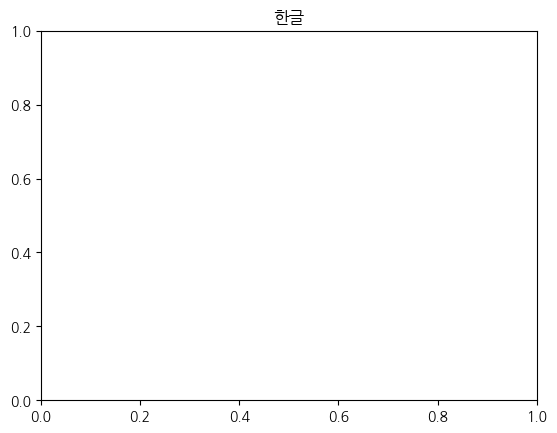

In [34]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
plt.title("ÌïúÍ∏Ä")

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

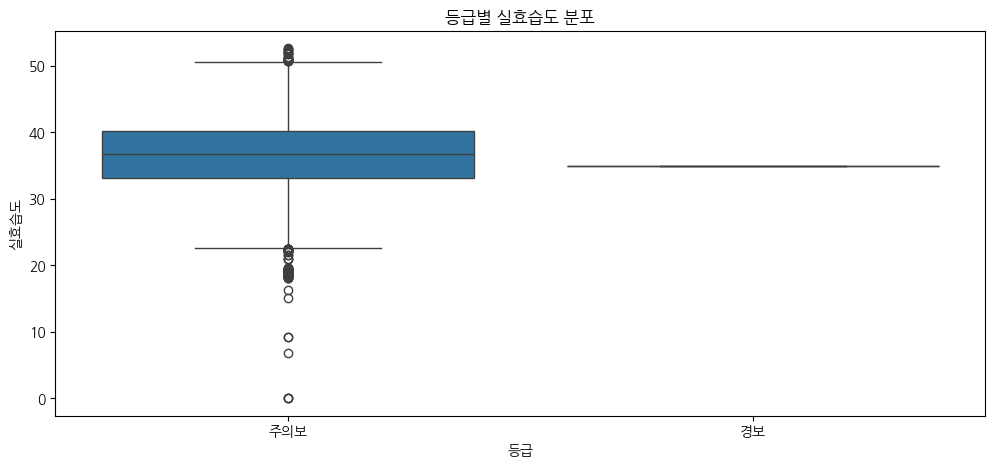

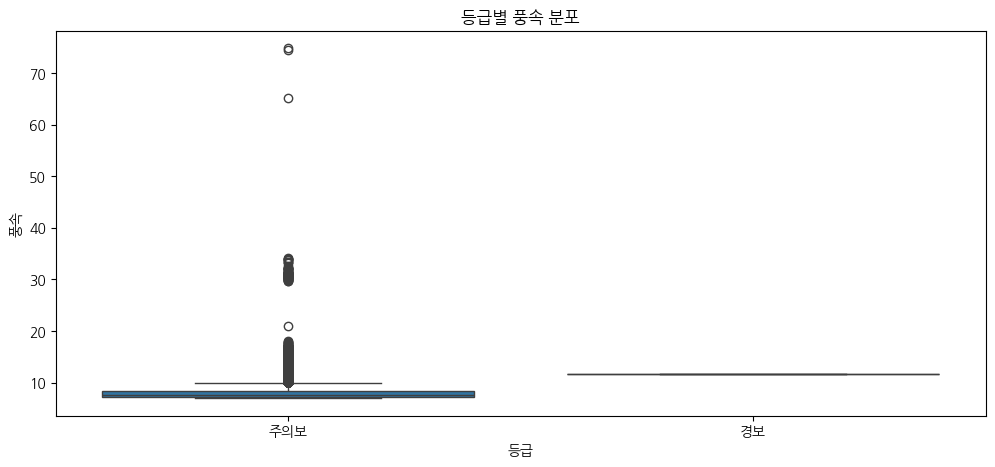

In [36]:
# Ïã§Ìö®ÏäµÎèÑ Î∂ÑÌè¨
plt.figure(figsize=(12, 5))
sns.boxplot(data=weather, x='Îì±Í∏â', y='Ïã§Ìö®ÏäµÎèÑ')
plt.title('Îì±Í∏âÎ≥Ñ Ïã§Ìö®ÏäµÎèÑ Î∂ÑÌè¨')
plt.show()

# ÌíçÏÜç Î∂ÑÌè¨
plt.figure(figsize=(12, 5))
sns.boxplot(data=weather, x='Îì±Í∏â', y='ÌíçÏÜç')
plt.title('Îì±Í∏âÎ≥Ñ ÌíçÏÜç Î∂ÑÌè¨')
plt.show()

In [37]:
weather.query('Îì±Í∏â == "Í≤ΩÎ≥¥"')

ÏòàÎ≥¥ÏùºÏãú  ÏãúÎèÑÎ™Ö ÏãúÍµ∞Íµ¨Î™Ö ÏùçÎ©¥ÎèôÎ™Ö  Ïã§Ìö®ÏäµÎèÑ    ÌíçÏÜç  Îì±Í∏â
952  2017-03-08 15:00  Í∞ïÏõêÎèÑ  Ï†ïÏÑ†Íµ∞  Ï†ïÏÑ†Ïùç  34.9  11.7  Í≤ΩÎ≥¥

In [38]:
import requests
from urllib.parse import quote

# 1. Ïù∏Ï¶ùÌÇ§ URL Ïù∏ÏΩîÎî©
service_key = "4HkFDjyzt0EqUMqeatELHviJQh1D7JxH7b6zDEwhhoJHyC5sNem/thF3LVBmk5909NeRYcLcmxAHxFYFCgWFwg=="

# 2. API ÏöîÏ≤≠
url = "http://apis.data.go.kr/1400377/forestPoint/forestPointListEmdSearch"
params = {
    "ServiceKey": service_key,
    "numOfRows": "10",
    "pageNo": "1",
    "localAreas": "11110101",
    "excludeForecast": "0",
    "_type": "json"
}

response = requests.get(url, params=params)

# 3. ÏùëÎãµ Ï≤òÎ¶¨
if response.headers.get("Content-Type", "").startswith("application/json"):
    data = response.json()
    print("‚úÖ JSON ÏùëÎãµ:", data)
else:
    print("‚ö†Ô∏è JSONÏù¥ ÏïÑÎãå ÏùëÎãµ (Î≥¥ÌÜµ XML):")
    print(response.text)

‚úÖ JSON ÏùëÎãµ: {'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'analdate': '2025-05-30 16', 'area': 79, 'codeemd': 11110101, 'doname': 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'emd': 'Ï≤≠Ïö¥Îèô', 'gungu': 'Ï¢ÖÎ°úÍµ¨', 'maxi': 85, 'meanavg': 76, 'mini': 66, 'regioncode': 11110101, 'std': 5, 'upplocalcd': 11}, {'analdate': '2025-05-30 21', 'area': 79, 'codeemd': 11110101, 'doname': 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'emd': 'Ï≤≠Ïö¥Îèô', 'gungu': 'Ï¢ÖÎ°úÍµ¨', 'maxi': 73, 'meanavg': 65, 'mini': 54, 'regioncode': 11110101, 'std': 5, 'upplocalcd': 11}, {'analdate': '2025-05-31 00', 'area': 79, 'codeemd': 11110101, 'doname': 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'emd': 'Ï≤≠Ïö¥Îèô', 'gungu': 'Ï¢ÖÎ°úÍµ¨', 'maxi': 67, 'meanavg': 58, 'mini': 42, 'regioncode': 11110101, 'std': 5, 'upplocalcd': 11}, {'analdate': '2025-05-31 03', 'area': 79, 'codeemd': 11110101, 'doname': 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'emd': 'Ï≤≠Ïö¥Îèô', 'gungu': 'Ï¢ÖÎ°úÍµ¨', 'maxi': 43, 'meanavg': 34, 'mini': 18, 'regioncode': 11110101, 's

In [39]:
# 1. API Ìò∏Ï∂ú URLÍ≥º ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
url = "http://apis.data.go.kr/1400377/forestPoint/forestPointListEmdSearch"
params = {
    "ServiceKey": service_key,
    "numOfRows": "10",
    "pageNo": "1",
    "localAreas": "11110101",
    "excludeForecast": "0",
    "_type": "json"
}


# 2. API ÏöîÏ≤≠ (GET Î∞©Ïãù)
response = requests.get(url, params=params)

# 3. ÏùëÎãµ JSON ÌååÏã±
data = response.json()

# 4. Î¶¨Ïä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú (Í≤ΩÎ°úÎäî API ÏùëÎãµ Íµ¨Ï°∞Ïóê Îî∞Îùº Îã§Î¶Ñ)
items = data['response']['body']['items']['item']

# 5. pandas Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df = pd.DataFrame(items)

# 6. ÎÇ†Ïßú Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ datetimeÏúºÎ°ú Î≥ÄÌôò (Ïòà: analdate)
if 'analdate' in df.columns:
    df['analdate'] = pd.to_datetime(df['analdate'], format='%Y-%m-%d %H')

# 7. Í≤∞Í≥º Ï∂úÎ†• ÎòêÎäî ÌõÑÏÜç Ï≤òÎ¶¨
print(df)

             analdate  area   codeemd doname  emd gungu  maxi  meanavg  mini  \
0 2025-05-30 16:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    85       76    66   
1 2025-05-30 21:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    73       65    54   
2 2025-05-31 00:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    67       58    42   
3 2025-05-31 03:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    43       34    18   
4 2025-05-31 06:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    49       40    24   
5 2025-05-31 09:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    73       65    54   
6 2025-05-31 12:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    85       76    66   
7 2025-05-31 15:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    85       76    66   
8 2025-05-31 18:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    79       70    54   
9 

In [40]:
df

analdate  area   codeemd doname  emd gungu  maxi  meanavg  mini  \
0 2025-05-30 16:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    85       76    66   
1 2025-05-30 21:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    73       65    54   
2 2025-05-31 00:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    67       58    42   
3 2025-05-31 03:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    43       34    18   
4 2025-05-31 06:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    49       40    24   
5 2025-05-31 09:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    73       65    54   
6 2025-05-31 12:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    85       76    66   
7 2025-05-31 15:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    85       76    66   
8 2025-05-31 18:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    79       70    54   
9 2025-05-31 21:00:00    79  11110101  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï≤≠Ïö¥Îèô   Ï¢ÖÎ°úÍµ¨    55       47    36   

   regioncode  std  upplocalcd  
0    11110101    5          11  
1    11110101    5          11  
2    11110101    5          11  
3    11110101    5          11  
4    11110101    5          11  
5    11110101    5          11  
6    11110101    5          11  
7    11110101    5          11  
8    11110101    5          11  
9    11110101    5          11

In [41]:
mtw = pd.read_csv('/Users/joomacbook/Desktop/Í≤ΩÎÇ® ÎπÖÎç∞Ïù¥ÌÑ∞ Í≥µÎ™®Ï†Ñ/MTW000101/TB_MTW_MNDST_WTHER_ONE_MNT_M.csv')

In [42]:
mtw

SPOT_NO      OBSRT_TM OBSRT_MNTN_NM  OBSRT_SPOT_ARCD  TEN_METER_TPRT  \
0           7893  2.014110e+11           ÌÜµÍ≥†ÏÇ∞               16             0.5   
1           2907  2.014110e+11           ÏÇ¨ÏûêÏÇ∞               10             2.4   
2           1912  2.014110e+11           Ï≤úÏû•ÏÇ∞                1             7.2   
3           1913  2.014110e+11           Ïö©ÎßàÏÇ∞                1             7.1   
4           1914  2.014110e+11            Î¥âÏÇ∞                1             8.5   
...          ...           ...           ...              ...             ...   
1048570     7891  2.014120e+11           Ï≤≠Ïò•ÏÇ∞               16            -5.5   
1048571     7894  2.014120e+11          Í∞ÄÏû¨ÎØ∏Ïû¨               16             0.4   
1048572     7895  2.014120e+11           ÏïÑÍµ¨ÏÇ∞               16            -0.6   
1048573     7901  2.014120e+11           ÎèÖÍ≤ΩÏÇ∞               16            -6.0   
1048574     7902  2.014120e+11           ÏÇøÍ∞ìÎ¥â               16            -2.7   

         TEN_METER_HMDT  TEN_METER_WNDRC TEN_METER_WNDRC_CHRCT_CONT  \
0                  99.2              8.5                          N   
1                  85.8             51.0                         NE   
2                  94.2            328.1                        NNW   
3                  94.2             90.8                          E   
4                  86.4             94.9                          E   
...                 ...              ...                        ...   
1048570            20.0             37.0                         NE   
1048571            27.7            340.3                        NNW   
1048572            21.1              2.7                          N   
1048573            57.9            302.3                        WNW   
1048574            48.0            289.7                        WNW   

         TEN_METER_WDSP  ELRT_RAIN_QNTT  ...  TWO_METER_WNDRC  \
0                   5.0             0.0  ...             25.0   
1                   4.6             0.0  ...             40.5   
2                   0.3             6.0  ...            334.7   
3                   2.8             6.5  ...            129.5   
4                   8.1             4.5  ...            102.6   
...                 ...             ...  ...              ...   
1048570             3.4             0.0  ...             72.4   
1048571             2.0             0.0  ...            347.3   
1048572             0.3             0.0  ...            340.9   
1048573             3.4             0.0  ...            295.4   
1048574             7.3             0.0  ...            318.6   

         TWO_METER_WNDRC_CHRCT_CONT  TWO_METER_WDSP  DATA_CONNO  OPERT_TPCD  \
0                               NNE             1.9           1           I   
1                                NE             4.5           2           I   
2                               NNW             0.4           3           I   
3                                SE             1.2           4           I   
4                               ESE             4.6           5           I   
...                             ...             ...         ...         ...   
1048570                         ENE             2.7     1048571           I   
1048571                         NNW             1.0     1048572           I   
1048572                         NNW             0.3     1048573           I   
1048573                         WNW             1.9     1048574           I   
1048574                          NW             3.2     1048575           I   

            OCCRR_DTM CNTCT_BGN_DTM  CNTCT_PRCES_DTM  CNTCT_PRCES_STCD  \
0        2.019100e+16           NaN              NaN                 N   
1        2.019100e+16           NaN              NaN                 N   
2        2.019100e+16           NaN              NaN                 N   
3        2.019100e+16           NaN              NaN                 N   
4        2.019100e+16  

In [43]:
mtw.rename(columns={
    'TEN_METER_WDSP': '10ÎØ∏ÌÑ∞ÌíçÏÜç',
    'ELRT_RAIN_QNTT': 'Ï†ÑÎèÑÏãùÍ∞ïÏö∞Îüâ',
    'WGHT_RAIN_QNTT': 'Î¨¥Í≤åÏãùÍ∞ïÏö∞Îüâ',
    'SPOT_NO': 'ÏßÄÏ†êÎ≤àÌò∏',
    'OBSRT_TM': 'Í¥ÄÏ∏°ÏãúÍ∞Ñ',
    'OBSRT_MNTN_NM': 'Í¥ÄÏ∏°ÏÇ∞Î™Ö',
    'OBSRT_SPOT_ARCD': 'Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú',
    'TEN_METER_TPRT': '10ÎØ∏ÌÑ∞Í∏∞Ïò®',
    'TEN_METER_HMDT': '10ÎØ∏ÌÑ∞ÏäµÎèÑ',
    'TEN_METER_WNDRC': '10ÎØ∏ÌÑ∞ÌíçÌñ•',
    'TEN_METER_WNDRC_CHRCT_CONT': '10ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©',
    'SPOT_ATMPR': 'ÏßÄÏ†êÍ∏∞Ïïï',
    'ESRF_TMPRT': 'ÏßÄÎ©¥Ïò®ÎèÑ',
    'TWO_METER_TPRT': '2ÎØ∏ÌÑ∞Í∏∞Ïò®',
    'TWO_METER_HMDT': '2ÎØ∏ÌÑ∞ÏäµÎèÑ',
    'TWO_METER_WNDRC': '2ÎØ∏ÌÑ∞ÌíçÌñ•',
    'TWO_METER_WNDRC_CHRCT_CONT': '2ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©',
    'TWO_METER_WDSP': '2ÎØ∏ÌÑ∞ÌíçÏÜç',
    'DATA_CONNO': 'Îç∞Ïù¥ÌÑ∞ÏùºÎ†®Î≤àÌò∏',
    'OPERT_TPCD': 'ÏûëÏóÖÍµ¨Î∂ÑÏΩîÎìú',
    'OCCRR_DTM': 'Î∞úÏÉùÏùºÏãú',
    'CNTCT_BGN_DTM': 'Ïó∞Í≥ÑÏãúÏûëÏùºÏãú',
    'CNTCT_PRCES_DTM': 'Ïó∞Í≥ÑÏ≤òÎ¶¨ÏùºÏãú',
    'CNTCT_PRCES_STCD': 'Ïó∞Í≥ÑÏ≤òÎ¶¨ÏÉÅÌÉúÏΩîÎìú',
    'TRNSA_ID': 'Ìä∏ÎûúÏ†ùÏÖòID'
}, inplace=True)

In [44]:
mtw

ÏßÄÏ†êÎ≤àÌò∏          Í¥ÄÏ∏°ÏãúÍ∞Ñ  Í¥ÄÏ∏°ÏÇ∞Î™Ö  Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú  10ÎØ∏ÌÑ∞Í∏∞Ïò®  10ÎØ∏ÌÑ∞ÏäµÎèÑ  10ÎØ∏ÌÑ∞ÌíçÌñ•  \
0        7893  2.014110e+11   ÌÜµÍ≥†ÏÇ∞        16     0.5    99.2     8.5   
1        2907  2.014110e+11   ÏÇ¨ÏûêÏÇ∞        10     2.4    85.8    51.0   
2        1912  2.014110e+11   Ï≤úÏû•ÏÇ∞         1     7.2    94.2   328.1   
3        1913  2.014110e+11   Ïö©ÎßàÏÇ∞         1     7.1    94.2    90.8   
4        1914  2.014110e+11    Î¥âÏÇ∞         1     8.5    86.4    94.9   
...       ...           ...   ...       ...     ...     ...     ...   
1048570  7891  2.014120e+11   Ï≤≠Ïò•ÏÇ∞        16    -5.5    20.0    37.0   
1048571  7894  2.014120e+11  Í∞ÄÏû¨ÎØ∏Ïû¨        16     0.4    27.7   340.3   
1048572  7895  2.014120e+11   ÏïÑÍµ¨ÏÇ∞        16    -0.6    21.1     2.7   
1048573  7901  2.014120e+11   ÎèÖÍ≤ΩÏÇ∞        16    -6.0    57.9   302.3   
1048574  7902  2.014120e+11   ÏÇøÍ∞ìÎ¥â        16    -2.7    48.0   289.7   

        10ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  10ÎØ∏ÌÑ∞ÌíçÏÜç  Ï†ÑÎèÑÏãùÍ∞ïÏö∞Îüâ  ...  2ÎØ∏ÌÑ∞ÌíçÌñ•  2ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  2ÎØ∏ÌÑ∞ÌíçÏÜç  Îç∞Ïù¥ÌÑ∞ÏùºÎ†®Î≤àÌò∏  \
0                N     5.0     0.0  ...   25.0        NNE    1.9        1   
1               NE     4.6     0.0  ...   40.5         NE    4.5        2   
2              NNW     0.3     6.0  ...  334.7        NNW    0.4        3   
3                E     2.8     6.5  ...  129.5         SE    1.2        4   
4                E     8.1     4.5  ...  102.6        ESE    4.6        5   
...            ...     ...     ...  ...    ...        ...    ...      ...   
1048570         NE     3.4     0.0  ...   72.4        ENE    2.7  1048571   
1048571        NNW     2.0     0.0  ...  347.3        NNW    1.0  1048572   
1048572          N     0.3     0.0  ...  340.9        NNW    0.3  1048573   
1048573        WNW     3.4     0.0  ...  295.4        WNW    1.9  1048574   
1048574        WNW     7.3     0.0  ...  318.6         NW    3.2  1048575   

         ÏûëÏóÖÍµ¨Î∂ÑÏΩîÎìú          Î∞úÏÉùÏùºÏãú Ïó∞Í≥ÑÏãúÏûëÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏÉÅÌÉúÏΩîÎìú Ìä∏ÎûúÏ†ùÏÖòID  
0             I  2.019100e+16    NaN     NaN         N    NaN  
1             I  2.019100e+16    NaN     NaN         N    NaN  
2             I  2.019100e+16    NaN     NaN         N    NaN  
3             I  2.019100e+16    NaN     NaN         N    NaN  
4             I  2.019100e+16    NaN     NaN         N    NaN  
...         ...           ...    ...     ...       ...    ...  
1048570       I  2.019100e+16    NaN     NaN         N    NaN  
1048571       I  2.019100e+16    NaN     NaN         N    NaN  
1048572       I  2.019100e+16    NaN     NaN         N    NaN  
1048573       I  2.019100e+16    NaN     NaN         N    NaN  
1048574       I  2.019100e+16    NaN     NaN         N    NaN  

[1048575 rows x 25 columns]

In [45]:
weather

ÏòàÎ≥¥ÏùºÏãú   ÏãúÎèÑÎ™Ö    ÏãúÍµ∞Íµ¨Î™Ö ÏùçÎ©¥ÎèôÎ™Ö  Ïã§Ìö®ÏäµÎèÑ    ÌíçÏÜç   Îì±Í∏â
0      2017-01-17 15:00   Í∞ïÏõêÎèÑ     Ïù∏Ï†úÍµ∞   Î∂ÅÎ©¥  34.6   7.3  Ï£ºÏùòÎ≥¥
1      2017-01-23 11:00  Í≤ΩÏÉÅÎ∂ÅÎèÑ  Ìè¨Ìï≠Ïãú ÎÇ®Íµ¨  Ïû•Í∏∞Î©¥  30.9   7.3  Ï£ºÏùòÎ≥¥
2      2017-01-24 14:00  Ï†ÑÎùºÎÇ®ÎèÑ     Ïó¨ÏàòÏãú  Í≤ΩÌò∏Îèô  36.2   7.3  Ï£ºÏùòÎ≥¥
3      2017-01-27 10:00  Í≤ΩÏÉÅÎ∂ÅÎèÑ  Ìè¨Ìï≠Ïãú Î∂ÅÍµ¨  Í∏∞Í≥ÑÎ©¥  34.2   8.4  Ï£ºÏùòÎ≥¥
4      2017-01-27 10:00  Í≤ΩÏÉÅÎ∂ÅÎèÑ     Í≤ΩÏ£ºÏãú  ÏïàÍ∞ïÏùç  34.1   7.8  Ï£ºÏùòÎ≥¥
...                 ...   ...     ...  ...   ...   ...  ...
40396  2025-02-28 13:00    Í≤ΩÎ∂Å      ÏòÅÏ£º  ÏïàÏ†ïÎ©¥  33.0   8.7  Ï£ºÏùòÎ≥¥
40397  2025-02-28 13:00    Í≤ΩÎ∂Å      ÏòàÏ≤ú  Í∞êÏ≤úÎ©¥  33.0   7.3  Ï£ºÏùòÎ≥¥
40398  2025-02-28 13:00    Í≤ΩÎ∂Å      Î¥âÌôî  Î¥âÌôîÏùç  33.0   7.9  Ï£ºÏùòÎ≥¥
40399  2025-02-28 13:00    Í∞ïÏõê      ÏñëÏñë  ÏÜêÏñëÎ©¥  27.7  11.7  Ï£ºÏùòÎ≥¥
40400  2025-02-28 14:00    Í∞ïÏõê      ÏñëÏñë  ÏÜêÏñëÎ©¥  27.6  11.7  Ï£ºÏùòÎ≥¥

[40401 rows x 7 columns]

In [46]:
weather.query('ÏãúÍµ∞Íµ¨Î™Ö == "ÏÇ∞Ï≤≠Íµ∞"')

ÏòàÎ≥¥ÏùºÏãú   ÏãúÎèÑÎ™Ö ÏãúÍµ∞Íµ¨Î™Ö ÏùçÎ©¥ÎèôÎ™Ö  Ïã§Ìö®ÏäµÎèÑ   ÌíçÏÜç   Îì±Í∏â
488  2017-02-20 12:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  Ï∞®Ìô©Î©¥  44.2  7.4  Ï£ºÏùòÎ≥¥
489  2017-02-20 12:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  Ïã†Îì±Î©¥  44.3  7.6  Ï£ºÏùòÎ≥¥
541  2017-02-20 13:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  Ï∞®Ìô©Î©¥  43.3  8.0  Ï£ºÏùòÎ≥¥
542  2017-02-20 13:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  Ïã†Îì±Î©¥  43.4  7.9  Ï£ºÏùòÎ≥¥
651  2017-02-20 15:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  ÏÇ∞Ï≤≠Ïùç  42.7  7.1  Ï£ºÏùòÎ≥¥
652  2017-02-20 15:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  ÏÇ∞Ï≤≠Ïùç  40.9  9.4  Ï£ºÏùòÎ≥¥
653  2017-02-20 15:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÇ∞Ï≤≠Íµ∞  Ïò§Î∂ÄÎ©¥  43.4  7.0  Ï£ºÏùòÎ≥¥

In [47]:
weather.query('ÏãúÍµ∞Íµ¨Î™Ö == "ÌïòÎèôÍµ∞"')

ÏòàÎ≥¥ÏùºÏãú   ÏãúÎèÑÎ™Ö ÏãúÍµ∞Íµ¨Î™Ö ÏùçÎ©¥ÎèôÎ™Ö  Ïã§Ìö®ÏäµÎèÑ   ÌíçÏÜç   Îì±Í∏â
486   2017-02-20 12:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Ï†ÅÎüâÎ©¥  41.1  8.8  Ï£ºÏùòÎ≥¥
487   2017-02-20 12:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  ÏñëÎ≥¥Î©¥  44.8  7.4  Ï£ºÏùòÎ≥¥
537   2017-02-20 13:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Í≥†Ï†ÑÎ©¥  42.4  7.7  Ï£ºÏùòÎ≥¥
538   2017-02-20 13:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Í∏àÎÇ®Î©¥  41.3  7.6  Ï£ºÏùòÎ≥¥
539   2017-02-20 13:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Í∏àÎÇ®Î©¥  44.8  7.8  Ï£ºÏùòÎ≥¥
540   2017-02-20 13:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  ÏñëÎ≥¥Î©¥  43.9  7.3  Ï£ºÏùòÎ≥¥
573   2017-02-20 14:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Í≥†Ï†ÑÎ©¥  41.6  7.4  Ï£ºÏùòÎ≥¥
574   2017-02-20 14:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  ÏñëÎ≥¥Î©¥  43.1  7.3  Ï£ºÏùòÎ≥¥
649   2017-02-20 15:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Í≥†Ï†ÑÎ©¥  40.9  8.9  Ï£ºÏùòÎ≥¥
650   2017-02-20 15:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  ÏñëÎ≥¥Î©¥  42.4  8.9  Ï£ºÏùòÎ≥¥
5167  2018-11-22 10:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  ÌïòÎèôÏùç  43.3  7.6  Ï£ºÏùòÎ≥¥
5168  2018-11-22 10:00  Í≤ΩÏÉÅÎÇ®ÎèÑ  ÌïòÎèôÍµ∞  Ïò•Ï¢ÖÎ©¥  43.3  7.6  Ï£ºÏùòÎ≥¥

In [48]:
weather.query('ÏãúÎèÑÎ™Ö == "Í≤ΩÏÉÅÎÇ®ÎèÑ"')['ÏãúÍµ∞Íµ¨Î™Ö'].value_counts()

ÏãúÍµ∞Íµ¨Î™Ö
Ìï®ÏïàÍµ∞          121
Ï∞ΩÎÖïÍµ∞           53
ÎÇ®Ìï¥Íµ∞           39
Í±∞Ï†úÏãú           31
ÏùòÎ†πÍµ∞           29
Í≥†ÏÑ±Íµ∞           28
ÏßÑÏ£ºÏãú           23
Ìï©Ï≤úÍµ∞           19
Î∞ÄÏñëÏãú           17
Ï∞ΩÏõêÏãú ÏùòÏ∞ΩÍµ¨       13
ÌïòÎèôÍµ∞           12
Ï∞ΩÏõêÏãú ÎßàÏÇ∞Ìï©Ìè¨Íµ¨     10
ÍπÄÌï¥Ïãú            9
ÏÇ∞Ï≤≠Íµ∞            7
Ï∞ΩÏõêÏãú ÏßÑÌï¥Íµ¨        7
Ï∞ΩÏõêÏãú ÎßàÏÇ∞ÌöåÏõêÍµ¨      6
ÏñëÏÇ∞Ïãú            4
ÏÇ¨Ï≤úÏãú            3
Name: count, dtype: int64

In [49]:
weather.describe()

Ïã§Ìö®ÏäµÎèÑ            ÌíçÏÜç
count  40401.000000  40401.000000
mean      36.533343      8.002141
std        4.706465      1.463373
min        0.000000      7.000000
25%       33.100000      7.300000
50%       36.700000      7.700000
75%       40.100000      8.400000
max       52.600000     74.800000

In [50]:
weather[weather['ÏãúÎèÑÎ™Ö']=='Í≤ΩÏÉÅÎÇ®ÎèÑ'].groupby('ÏãúÍµ∞Íµ¨Î™Ö').count()

ÏòàÎ≥¥ÏùºÏãú  ÏãúÎèÑÎ™Ö  ÏùçÎ©¥ÎèôÎ™Ö  Ïã§Ìö®ÏäµÎèÑ   ÌíçÏÜç   Îì±Í∏â
ÏãúÍµ∞Íµ¨Î™Ö                                      
Í±∞Ï†úÏãú          31   31    31    31   31   31
Í≥†ÏÑ±Íµ∞          28   28    28    28   28   28
ÍπÄÌï¥Ïãú           9    9     9     9    9    9
ÎÇ®Ìï¥Íµ∞          39   39    39    39   39   39
Î∞ÄÏñëÏãú          17   17    17    17   17   17
ÏÇ¨Ï≤úÏãú           3    3     3     3    3    3
ÏÇ∞Ï≤≠Íµ∞           7    7     7     7    7    7
ÏñëÏÇ∞Ïãú           4    4     4     4    4    4
ÏùòÎ†πÍµ∞          29   29    29    29   29   29
ÏßÑÏ£ºÏãú          23   23    23    23   23   23
Ï∞ΩÎÖïÍµ∞          53   53    53    53   53   53
Ï∞ΩÏõêÏãú ÎßàÏÇ∞Ìï©Ìè¨Íµ¨    10   10    10    10   10   10
Ï∞ΩÏõêÏãú ÎßàÏÇ∞ÌöåÏõêÍµ¨     6    6     6     6    6    6
Ï∞ΩÏõêÏãú ÏùòÏ∞ΩÍµ¨      13   13    13    13   13   13
Ï∞ΩÏõêÏãú ÏßÑÌï¥Íµ¨       7    7     7     7    7    7
ÌïòÎèôÍµ∞          12   12    12    12   12   12
Ìï®ÏïàÍµ∞         121  121   121   121  121  121
Ìï©Ï≤úÍµ∞          19   19    19    19   19   19

In [51]:
# Ìè¨Ìï®ÏãúÌÇ¨ ÏÇ∞ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
mountain_names = [
    'Í∏àÏò§ÏÇ∞', 'ÏÇºÏã†Î¥â', 'ÏÑ±Ï†úÎ¥â', 'Ïπ†ÏÑ±Î¥â', 'Ï†ïÏïàÏÇ∞', 'ÏÇ¨Î¶ºÏÇ∞',
    'Ïö∞Î∞©ÏÇ∞', 'ÎëêÎ∞©ÏÇ∞', 'Ìù∞Îç§ÏÇ∞', 'ÏùºÏ≤úÎ¥â', 'Ïò•ÏÇ∞', 'ÏÜîÎ¥â',
    'ÌôîÏû•ÏÇ∞', 'Í∏àÎåÄÎ¥â', 'ÏÇºÏ†ïÏÇ∞', 'ÏÇºÎ¥âÏÇ∞', 'Î∞±ÏïîÏÇ∞', 'Íµ¨Í≥°ÏÇ∞', 'Ï£ºÏÇ∞'
]

# ÌïÑÌÑ∞ÎßÅ
mtw1223 = mtw[mtw['Í¥ÄÏ∏°ÏÇ∞Î™Ö'].isin(mountain_names)]

# Í≤∞Í≥º Ï∂úÎ†•
mtw1223['Í¥ÄÏ∏°ÏÇ∞Î™Ö'].unique()

array(['ÏÇºÎ¥âÏÇ∞'], dtype=object)

In [52]:
mtw1223

ÏßÄÏ†êÎ≤àÌò∏          Í¥ÄÏ∏°ÏãúÍ∞Ñ Í¥ÄÏ∏°ÏÇ∞Î™Ö  Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú  10ÎØ∏ÌÑ∞Í∏∞Ïò®  10ÎØ∏ÌÑ∞ÏäµÎèÑ  10ÎØ∏ÌÑ∞ÌíçÌñ• 10ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  \
98       3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -5.7    52.7   329.3        NNW   
142      3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -5.5    51.8   326.2         NW   
200      3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -5.6    55.6   326.7        NNW   
253      3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -5.6    53.1   326.9        NNW   
342      3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -5.5    50.0   323.5         NW   
...       ...           ...  ...       ...     ...     ...     ...        ...   
1048051  3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -8.6    94.3   320.1         NW   
1048178  3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -8.1    75.0   327.8        NNW   
1048249  3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -2.0    16.6   311.3         NW   
1048338  3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -1.2    17.7   353.3          N   
1048482  3900  2.014120e+11  ÏÇºÎ¥âÏÇ∞        12    -2.0    59.3   314.3         NW   

         10ÎØ∏ÌÑ∞ÌíçÏÜç  Ï†ÑÎèÑÏãùÍ∞ïÏö∞Îüâ  ...  2ÎØ∏ÌÑ∞ÌíçÌñ•  2ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  2ÎØ∏ÌÑ∞ÌíçÏÜç  Îç∞Ïù¥ÌÑ∞ÏùºÎ†®Î≤àÌò∏  ÏûëÏóÖÍµ¨Î∂ÑÏΩîÎìú  \
98          4.9     0.0  ...  320.8         NW    4.5       99       I   
142         5.1     0.0  ...  315.2         NW    5.0      143       I   
200         5.5     0.0  ...  316.9         NW    5.3      201       I   
253         6.1     0.0  ...  319.2         NW    6.0      254       I   
342         4.9     0.0  ...  314.6         NW    4.8      343       I   
...         ...     ...  ...    ...        ...    ...      ...     ...   
1048051     3.8     0.0  ...  314.2         NW    3.4  1048052       I   
1048178     3.5     0.0  ...  317.8         NW    3.2  1048179       I   
1048249     1.7     0.0  ...  297.5        WNW    1.5  1048250       I   
1048338     0.5     0.0  ...  327.7        NNW    0.6  1048339       I   
1048482     2.6     0.0  ...  304.4         NW    2.0  1048483       I   

                 Î∞úÏÉùÏùºÏãú Ïó∞Í≥ÑÏãúÏûëÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏÉÅÌÉúÏΩîÎìú Ìä∏ÎûúÏ†ùÏÖòID  
98       2.019100e+16    NaN     NaN         N    NaN  
142      2.019100e+16    NaN     NaN         N    NaN  
200      2.019100e+16    NaN     NaN         N    NaN  
253      2.019100e+16    NaN     NaN         N    NaN  
342      2.019100e+16    NaN     NaN         N    NaN  
...               ...    ...     ...       ...    ...  
1048051  2.019100e+16    NaN     NaN         N    NaN  
1048178  2.019100e+16    NaN     NaN         N    NaN  
1048249  2.019100e+16    NaN     NaN         N    NaN  
1048338  2.019100e+16    NaN     NaN         N    NaN  
1048482  2.019100e+16    NaN     NaN         N    NaN  

[12062 rows x 25 columns]

In [53]:
mtw['Í¥ÄÏ∏°ÏÇ∞Î™Ö'].unique()

array(['ÌÜµÍ≥†ÏÇ∞', 'ÏÇ¨ÏûêÏÇ∞', 'Ï≤úÏû•ÏÇ∞', 'Ïö©ÎßàÏÇ∞', 'Î¥âÏÇ∞', 'Í∞úÌôîÏÇ∞', 'Íµ¨Î£°ÏÇ∞', 'Í¥ÄÏïÖÏÇ∞', 'ÏàòÎùΩÏÇ∞',
       'Ìô©ÌïôÏÇ∞', 'Ïπ†Î≥¥ÏÇ∞', 'Ïö¥ÏïÖÏÇ∞', 'ÎÜçÏïîÏÇ∞', 'Î∞∞Ìñ•ÏÇ∞', 'ÎÇ®Î≥ëÏÇ∞', 'ÎåÄÌïôÏÇ∞', 'Í∞ÄÎ¶¨ÏÇ∞', 'Ïû•ÏÑùÏÇ∞',
       'Ï≤úÎì±ÏÇ∞', 'ÏõêÌÜµÏÇ∞', 'ÎÇ®ÏÇ∞', 'ÎèÑÏÜîÎ¥â', 'ÌåîÏùåÏÇ∞', 'Í∏àÎã®ÏÇ∞', 'ÌÉëÏÇ∞', 'Î∞≠Î∞±ÏÇ∞', 'Ïπ†Î∂àÏÇ∞', 'Î≥¥Î¨∏ÏÇ∞',
       'Í≥†ÎèôÏÇ∞', 'Í≥†ÏÇ∞Î¥â', 'Î≥ëÌíçÏÇ∞', 'Ï≤úÏÑ±ÏÇ∞', 'Ïö©ÏïîÏÇ∞', 'ÌÅ∞Ïû¨', 'Í∞ÄÏû¨ÎØ∏Ïû¨', 'ÏÇøÍ∞ìÎ¥â', 'ÎÇ¥Ïó∞ÏÇ∞',
       'Î∞ïÏÑùÏÇ∞', 'Í≥ÑÏ°±ÏÇ∞', 'Î∞îÎûòÍ∏∞ÏÇ∞', 'ÎπÑÎ¥âÏÇ∞', 'ÌòïÏ†úÎ¥â', 'Î≤ïÌôîÏÇ∞', 'Ìñ•Î°úÎ¥â', 'Îã®ÏßÄÎ¥â', 'ÎåÄÍ∏∞Î¥â',
       'ÏòÅÏ∑®ÏÇ∞(Î≥ëÎ¥â)', 'ÏòÅÏ∑®ÏÇ∞(ÏãúÏÇ¥Îì±)', 'Îä•ÎèôÏÇ∞', 'Ï≤úÏ£ºÏÇ∞', 'Ïã§Î¥âÏÇ∞', 'ÎëîÏ≤†ÏÇ∞', 'ÌïúÏö∞ÏÇ∞', 'Î∂àÎ™®ÏÇ∞',
       'Í¥ÄÎ∂àÏÇ∞', 'Î∞±Ïö¥ÏÇ∞', 'ÎåÄÏö¥ÏÇ∞', 'Î∞±ÏñëÏÇ∞', 'ÏôïÎì±Ïû¨', 'ÏÇ¨Í∏∞Îßâ', 'Î¥âÌôîÏπò', 'Í∞ÄÎìùÎ¥â', 'Í∞êÏó∞ÏÇ∞',
       'ÌôçÎ¶âÏàòÎ™©Ïõê', 'ÎßàÍ∞êÏÇ∞', 'ÌïúÏÑùÏÇ∞', 'Î∂àÎ∞úÎ†π', 'ÏÇ¨Í∏àÏÇ∞', 'Î∞ïÎã¨ÏÇ∞', 'ÏÇºÎ¥âÏÇ∞', 'Ï≤≠Ïò•ÏÇ∞', 'Î

In [54]:
mtw['Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú'].unique()

array([16, 10,  1,  9, 13, 12,  2,  7, 15,  8,  3])

In [55]:
mtw.query('Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú == 15')

ÏßÄÏ†êÎ≤àÌò∏          Í¥ÄÏ∏°ÏãúÍ∞Ñ Í¥ÄÏ∏°ÏÇ∞Î™Ö  Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú  10ÎØ∏ÌÑ∞Í∏∞Ïò®  10ÎØ∏ÌÑ∞ÏäµÎèÑ  10ÎØ∏ÌÑ∞ÌíçÌñ• 10ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  \
32       8911  2.014110e+11  Ï≤úÏÑ±ÏÇ∞        15    12.9    74.3    82.6          E   
43       8891  2.014110e+11  ÌòïÏ†úÎ¥â        15     5.0    99.9   116.1        ESE   
45       8894  2.014110e+11  Î≤ïÌôîÏÇ∞        15     6.9    95.4   101.4        ESE   
46       8895  2.014110e+11  Ìñ•Î°úÎ¥â        15    12.8    77.1   110.5        ESE   
47       8896  2.014110e+11  Îã®ÏßÄÎ¥â        15     7.0    97.9   334.5        NNW   
...       ...           ...  ...       ...     ...     ...     ...        ...   
1048527  8894  2.014120e+11  Î≤ïÌôîÏÇ∞        15     0.4    10.9   308.9         NW   
1048528  8894  2.014120e+11  Î≤ïÌôîÏÇ∞        15     0.4    10.9   289.5        WNW   
1048529  8894  2.014120e+11  Î≤ïÌôîÏÇ∞        15     0.4    11.0   291.9        WNW   
1048530  8894  2.014120e+11  Î≤ïÌôîÏÇ∞        15     0.5    11.0   284.6        WNW   
1048568  8911  2.014120e+11  Ï≤úÏÑ±ÏÇ∞        15     2.2    18.9    91.1          E   

         10ÎØ∏ÌÑ∞ÌíçÏÜç  Ï†ÑÎèÑÏãùÍ∞ïÏö∞Îüâ  ...  2ÎØ∏ÌÑ∞ÌíçÌñ•  2ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  2ÎØ∏ÌÑ∞ÌíçÏÜç  Îç∞Ïù¥ÌÑ∞ÏùºÎ†®Î≤àÌò∏  ÏûëÏóÖÍµ¨Î∂ÑÏΩîÎìú  \
32          2.8     0.0  ...   91.4          E    1.3       33       I   
43          9.9     1.5  ...  131.0         SE    2.6       44       I   
45          0.8     0.5  ...   83.1          E    1.0       46       I   
46          4.4     0.0  ...  113.4        ESE    3.7       47       I   
47          0.4     1.5  ...  317.1         NW    0.5       48       I   
...         ...     ...  ...    ...        ...    ...      ...     ...   
1048527     1.3     0.0  ...  252.3        WSW    0.5  1048528       I   
1048528     1.5     0.0  ...  252.1        WSW    0.8  1048529       I   
1048529     1.2     0.0  ...  250.3        WSW    0.8  1048530       I   
1048530     1.5     0.0  ...  248.6        WSW    0.8  1048531       I   
1048568     1.4     0.0  ...   89.6          E    0.9  1048569       I   

                 Î∞úÏÉùÏùºÏãú Ïó∞Í≥ÑÏãúÏûëÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏÉÅÌÉúÏΩîÎìú Ìä∏ÎûúÏ†ùÏÖòID  
32       2.019100e+16    NaN     NaN         N    NaN  
43       2.019100e+16    NaN     NaN         N    NaN  
45       2.019100e+16    NaN     NaN         N    NaN  
46       2.019100e+16    NaN     NaN         N    NaN  
47       2.019100e+16    NaN     NaN         N    NaN  
...               ...    ...     ...       ...    ...  
1048527  2.019100e+16    NaN     NaN         N    NaN  
1048528  2.019100e+16    NaN     NaN         N    NaN  
1048529  2.019100e+16    NaN     NaN         N    NaN  
1048530  2.019100e+16    NaN     NaN         N    NaN  
1048568  2.019100e+16    NaN     NaN         N    NaN  

[193493 rows x 25 columns]

In [56]:
# Ï°∞Í±¥ ÏÑ§Ï†ï
target_mountains = ['ÏÇºÎ¥âÏÇ∞', 'ÌòïÏ†úÎ¥â', 'ÎëîÏ≤†ÏÇ∞', 'Í∞êÌà¨Î¥â']

# ÌïÑÌÑ∞ÎßÅ
filtered_df = mtw.query("Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú == 15 and Í¥ÄÏ∏°ÏÇ∞Î™Ö in @target_mountains")


In [57]:
filtered_df

ÏßÄÏ†êÎ≤àÌò∏          Í¥ÄÏ∏°ÏãúÍ∞Ñ Í¥ÄÏ∏°ÏÇ∞Î™Ö  Í¥ÄÏ∏°ÏßÄÏ†êÏßÄÏó≠ÏΩîÎìú  10ÎØ∏ÌÑ∞Í∏∞Ïò®  10ÎØ∏ÌÑ∞ÏäµÎèÑ  10ÎØ∏ÌÑ∞ÌíçÌñ• 10ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  \
43       8891  2.014110e+11  ÌòïÏ†úÎ¥â        15     5.0    99.9   116.1        ESE   
54       8903  2.014110e+11  ÎëîÏ≤†ÏÇ∞        15     8.9    92.5   216.1         SW   
159      8891  2.014120e+11  ÌòïÏ†úÎ¥â        15    -8.9    72.3   297.0        WNW   
189      8903  2.014120e+11  ÎëîÏ≤†ÏÇ∞        15    -3.3    53.3   284.9        WNW   
196      8891  2.014120e+11  ÌòïÏ†úÎ¥â        15    -8.8    73.3   292.6        WNW   
...       ...           ...  ...       ...     ...     ...     ...        ...   
1048295  8903  2.014120e+11  ÎëîÏ≤†ÏÇ∞        15     1.8    35.6    25.2        NNE   
1048361  8891  2.014120e+11  ÌòïÏ†úÎ¥â        15     1.0    38.0   120.9        ESE   
1048369  8903  2.014120e+11  ÎëîÏ≤†ÏÇ∞        15     1.7    43.8   100.8          E   
1048424  8891  2.014120e+11  ÌòïÏ†úÎ¥â        15     0.8    39.5   124.2         SE   
1048434  8903  2.014120e+11  ÎëîÏ≤†ÏÇ∞        15     1.1    43.6   131.2         SE   

         10ÎØ∏ÌÑ∞ÌíçÏÜç  Ï†ÑÎèÑÏãùÍ∞ïÏö∞Îüâ  ...  2ÎØ∏ÌÑ∞ÌíçÌñ•  2ÎØ∏ÌÑ∞ÌíçÌñ•Î¨∏ÏûêÎÇ¥Ïö©  2ÎØ∏ÌÑ∞ÌíçÏÜç  Îç∞Ïù¥ÌÑ∞ÏùºÎ†®Î≤àÌò∏  ÏûëÏóÖÍµ¨Î∂ÑÏΩîÎìú  \
43          9.9     1.5  ...  131.0         SE    2.6       44       I   
54          0.8     1.5  ...  174.9          S    0.4       55       I   
159         3.4     0.5  ...  278.4          W    0.8      160       I   
189         4.4     0.0  ...  139.1         SE    3.1      190       I   
196         4.2     0.5  ...  279.2          W    1.3      197       I   
...         ...     ...  ...    ...        ...    ...      ...     ...   
1048295     0.6     0.0  ...    0.0          N    0.0  1048296       I   
1048361     1.3     0.0  ...  121.8        ESE    1.1  1048362       I   
1048369     0.5     0.0  ...  117.5        ESE    0.2  1048370       I   
1048424     1.5     0.0  ...  131.0         SE    1.1  1048425       I   
1048434     1.5     0.0  ...   74.8        ENE    0.7  1048435       I   

                 Î∞úÏÉùÏùºÏãú Ïó∞Í≥ÑÏãúÏûëÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏùºÏãú  Ïó∞Í≥ÑÏ≤òÎ¶¨ÏÉÅÌÉúÏΩîÎìú Ìä∏ÎûúÏ†ùÏÖòID  
43       2.019100e+16    NaN     NaN         N    NaN  
54       2.019100e+16    NaN     NaN         N    NaN  
159      2.019100e+16    NaN     NaN         N    NaN  
189      2.019100e+16    NaN     NaN         N    NaN  
196      2.019100e+16    NaN     NaN         N    NaN  
...               ...    ...     ...       ...    ...  
1048295  2.019100e+16    NaN     NaN         N    NaN  
1048361  2.019100e+16    NaN     NaN         N    NaN  
1048369  2.019100e+16    NaN     NaN         N    NaN  
1048424  2.019100e+16    NaN     NaN         N    NaN  
1048434  2.019100e+16    NaN     NaN         N    NaN  

[24226 rows x 25 columns]

In [60]:
dwi = pd.read_csv('/Users/joomacbook/Desktop/Í≤ΩÎÇ® ÎπÖÎç∞Ïù¥ÌÑ∞ Í≥µÎ™®Ï†Ñ/Í∏∞ÏÉÅÍ¥ÄÏ∏°_DWI (1).csv')

In [61]:
dwi

ÎÇ†Ïßú   ÏßÄÏó≠  ÏµúÍ≥†Í∏∞Ïò®       ÌèâÍ∑†ÏäµÎèÑ       Ïã§Ìö®ÏäµÎèÑ      ÌèâÍ∑†ÌíçÏÜç  ÏùºÍ∞ïÏàòÎüâ   Í≥ÑÏ†à  \
0     2024-01-01  Í≥†Ï†ÑÎ©¥  11.3  74.958333  82.253333  0.479167   0.0   Î¥ÑÏ≤†   
1     2024-01-02  Í≥†Ï†ÑÎ©¥  11.3  69.250000  76.160000  1.383333   0.0   Î¥ÑÏ≤†   
2     2024-01-03  Í≥†Ï†ÑÎ©¥   8.9  61.083333  64.730000  2.633333   0.0   Î¥ÑÏ≤†   
3     2024-01-04  Í≥†Ï†ÑÎ©¥   9.8  72.875000  83.580000  0.587500   0.0   Î¥ÑÏ≤†   
4     2024-01-05  Í≥†Ï†ÑÎ©¥  13.2  76.625000  85.443333  1.129167   0.0   Î¥ÑÏ≤†   
...          ...  ...   ...        ...        ...       ...   ...  ...   
8779  2024-12-27  Ìö°Ï≤úÎ©¥   6.6  52.416667  59.236667  3.062500   0.0  Í∞ÄÏùÑÏ≤†   
8780  2024-12-28  Ìö°Ï≤úÎ©¥   4.8  59.291667  66.966667  2.425000   0.0  Í∞ÄÏùÑÏ≤†   
8781  2024-12-29  Ìö°Ï≤úÎ©¥   9.0  69.500000  79.403333  1.183333   0.0  Í∞ÄÏùÑÏ≤†   
8782  2024-12-30  Ìö°Ï≤úÎ©¥  12.3  59.500000  57.233333  1.841667   0.0  Í∞ÄÏùÑÏ≤†   
8783  2024-12-31  Ìö°Ï≤úÎ©¥   9.4  52.958333  67.526667  1.766667   0.0  Í∞ÄÏùÑÏ≤†   

           DWI  
0     0.604205  
1     0.622231  
2     0.648478  
3     0.601731  
4     0.601477  
...        ...  
8779  0.606883  
8780  0.586182  
8781  0.586566  
8782  0.628457  
8783  0.637098  

[8784 rows x 9 columns]

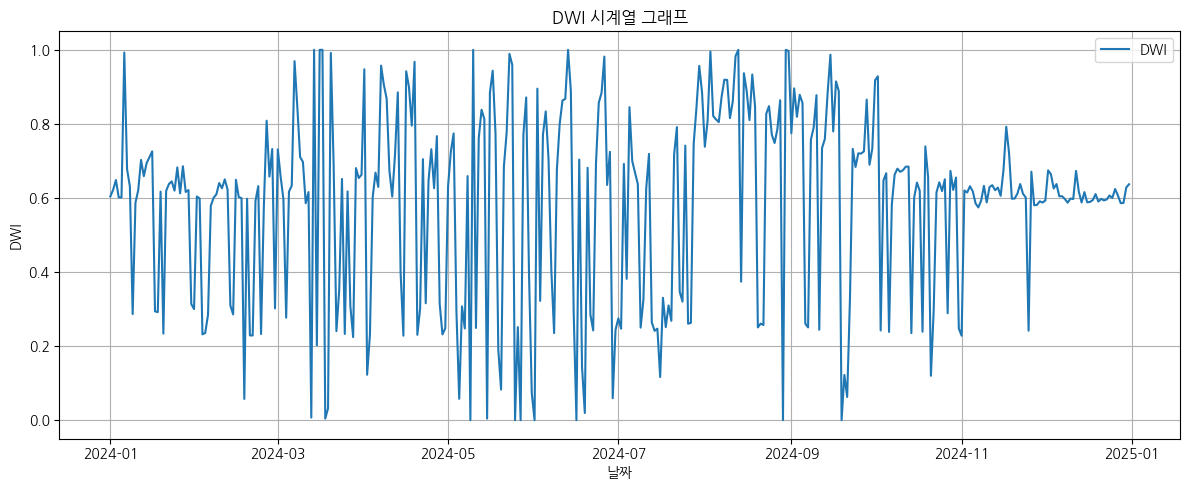

In [68]:
plt.figure(figsize=(12, 5))
plt.plot(gojeon_df['ÎÇ†Ïßú'], gojeon_df['DWI'], label='DWI')

plt.title('DWI ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('DWI')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()